IPL winner prediction model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading dataset

In [6]:
ipl_data = pd.read_csv("C:\\Users\\Faris\\Desktop\\Capstone\\IPL_Dataset.csv")
ipl_data

,Name,Team,Url,Type,ValueinCR,Full Name,Born,Age,National Side,Batting Style,...,Maidens,RunsConceded,Wickets,Best,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
0,Mayank Agarwal,PBKS,https://sports.ndtv.com/cricket/players/1430-m...,Batsman,12.00,Mayank Anurag Agarwal,"February 16, 1991 Bangalore, Karnataka","31 Years, 0 Months, 28 Days",India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Liam Livingstone,PBKS,https://sports.ndtv.com/cricket/players/64363-...,All-Rounder,11.50,Liam Stephen Livingstone,"August 4, 1993 Barrow-in-Furness, Cumberland","28 Years, 7 Months, 11 Days",England,Right Handed,...,0.0,13.0,0.0,0/13 v MI,0.0,0.0,NaN,13.00,NaN,1.0
2,Kagiso Rabada,PBKS,https://sports.ndtv.com/cricket/players/64042-...,Bowler,9.25,Kagiso Rabada,"May 25, 1995 Johannesburg","26 Years, 9 Months, 22 Days",South Africa,Left Handed,...,2.0,1560.0,76.0,4/21 v RCB,4.0,0.0,20.52,8.21,15.00,50.0
3,Shahrukh Khan,PBKS,https://sports.ndtv.com/cricket/players/113433...,All-Rounder,9.00,Masood Shahrukh Khan,"May 27, 1995 Chennai, Tamil Nadu","26 Years, 9 Months, 20 Days",India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shikhar Dhawan,PBKS,https://sports.ndtv.com/cricket/players/737-sh...,Batsman,8.25,Shikhar Dhawan,"December 5, 1985 Delhi","36 Years, 3 Months, 10 Days",India,Left Handed,...,0.0,66.0,4.0,1/7 v DC,0.0,0.0,16.50,8.25,12.00,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Gurkeerat Singh Mann,GT,https://sports.ndtv.com/cricket/players/1661-g...,All-Rounder,0.50,Gurkeerat Rupinder Singh,"June 29, 1990 Muktsar, Punjab","31 Years, 8 Months, 16 Days",India,Right Handed,...,0.0,97.0,5.0,2/15 v RPS,0.0,0.0,19.40,7.46,15.60,6.0
233,Noor Ahmad,GT,https://sports.ndtv.com/cricket/players/112545...,Bowler,0.30,Noor Ahmad Lakanwal,"January 3, 2005","17 Years, 2 Months, 12 Days",Afghanistan,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,Darshan Nalkande,GT,https://sports.ndtv.com/cricket/players/110589...,All-Rounder,0.20,Darshan Girish Nalkande,"October 4, 1998 Wardha, Maharashtra","23 Years, 5 Months, 11 Days",India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,Sai Sudharsan,GT,https://sports.ndtv.com/cricket/players/115302...,All-Rounder,0.20,Bhardwaj Sai Sudharsan,"October 15, 2001","20 Years, 5 Months, 0 Days",India,Left Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(ipl_data.head())

               Name  Team                                                Url  \
0    Mayank Agarwal  PBKS  https://sports.ndtv.com/cricket/players/1430-m...   
1  Liam Livingstone  PBKS  https://sports.ndtv.com/cricket/players/64363-...   
2     Kagiso Rabada  PBKS  https://sports.ndtv.com/cricket/players/64042-...   
3     Shahrukh Khan  PBKS  https://sports.ndtv.com/cricket/players/113433...   
4    Shikhar Dhawan  PBKS  https://sports.ndtv.com/cricket/players/737-sh...   

           Type  ValueinCR                 Full Name  \
0      Batsman       12.00     Mayank Anurag Agarwal   
1  All-Rounder       11.50  Liam Stephen Livingstone   
2       Bowler        9.25             Kagiso Rabada   
3  All-Rounder        9.00      Masood Shahrukh Khan   
4      Batsman        8.25            Shikhar Dhawan   

                                           Born                          Age  \
0        February 16, 1991 Bangalore, Karnataka  31 Years, 0 Months, 28 Days   
1  August 4, 1993 Barr

In [13]:
ipl_data_cleaned = ipl_data.dropna(subset=['Sport'])
ipl_data_cleaned

,Name,Team,Url,Type,ValueinCR,Full Name,Born,Age,National Side,Batting Style,...,Maidens,RunsConceded,Wickets,Best,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
1,Liam Livingstone,PBKS,https://sports.ndtv.com/cricket/players/64363-...,All-Rounder,11.50,Liam Stephen Livingstone,"August 4, 1993 Barrow-in-Furness, Cumberland","28 Years, 7 Months, 11 Days",England,Right Handed,...,0.0,13.0,0.0,0/13 v MI,0.0,0.0,NaN,13.00,NaN,1.0
2,Kagiso Rabada,PBKS,https://sports.ndtv.com/cricket/players/64042-...,Bowler,9.25,Kagiso Rabada,"May 25, 1995 Johannesburg","26 Years, 9 Months, 22 Days",South Africa,Left Handed,...,2.0,1560.0,76.0,4/21 v RCB,4.0,0.0,20.52,8.21,15.00,50.0
4,Shikhar Dhawan,PBKS,https://sports.ndtv.com/cricket/players/737-sh...,Batsman,8.25,Shikhar Dhawan,"December 5, 1985 Delhi","36 Years, 3 Months, 10 Days",India,Left Handed,...,0.0,66.0,4.0,1/7 v DC,0.0,0.0,16.50,8.25,12.00,6.0
7,Rahul Chahar,PBKS,https://sports.ndtv.com/cricket/players/107512...,Bowler,5.25,Rahul Desraj Chahar,"August 4, 1999 Bharaatpur, Rajasthan","22 Years, 7 Months, 12 Days",India,Right Handed,...,0.0,1117.0,43.0,4/27 v KKR,3.0,0.0,25.97,7.44,20.93,41.0
8,Arshdeep Singh,PBKS,https://sports.ndtv.com/cricket/players/108557...,Bowler,4.00,Arshdeep Singh,"February 5, 1999 Guna, Madhya Pradesh","23 Years, 1 Months, 8 Days",India,Left Handed,...,1.0,669.0,30.0,5/32 v RR,3.0,1.0,22.30,8.78,15.23,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,Jayant Yadav,GT,https://sports.ndtv.com/cricket/players/60086-...,All-Rounder,1.70,Jayant Yadav,"January 22, 1990 Delhi","32 Years, 1 Months, 21 Days",India,Right Handed,...,0.0,419.0,8.0,1/8 v CSK,0.0,0.0,52.37,6.86,45.75,19.0
229,Vijay Shankar,GT,https://sports.ndtv.com/cricket/players/62197-...,All-Rounder,1.40,Vijay Shankar,"January 26, 1991 Tirunelveli, Tamil Nadu","31 Years, 1 Months, 18 Days",India,Right Handed,...,0.0,329.0,9.0,2/19 v MI,0.0,0.0,36.55,8.62,25.44,20.0
231,Varun Aaron,GT,https://sports.ndtv.com/cricket/players/1252-v...,Bowler,0.50,Varun Raymond Aaron,"October 29, 1989 Singhbhum, Bihar (now Jharkhand)","32 Years, 4 Months, 17 Days",India,Right Handed,...,2.0,1429.0,42.0,3/16 v KKR,1.0,0.0,34.02,8.89,22.95,48.0
232,Gurkeerat Singh Mann,GT,https://sports.ndtv.com/cricket/players/1661-g...,All-Rounder,0.50,Gurkeerat Rupinder Singh,"June 29, 1990 Muktsar, Punjab","31 Years, 8 Months, 16 Days",India,Right Handed,...,0.0,97.0,5.0,2/15 v RPS,0.0,0.0,19.40,7.46,15.60,6.0


In [14]:
ipl_data_cleaned.to_csv('cleaned_ipl_data.csv',index=False)

In [16]:
u_ipl=ipl_data_cleaned['Sport'].unique()
u_ipl

array(['IPL', 'Cricket'], dtype=object)

In [18]:
df_cleaned =ipl_data_cleaned[ipl_data_cleaned['Sport']!='Cricket']
df_cleaned 

,Name,Team,Url,Type,ValueinCR,Full Name,Born,Age,National Side,Batting Style,...,Maidens,RunsConceded,Wickets,Best,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
1,Liam Livingstone,PBKS,https://sports.ndtv.com/cricket/players/64363-...,All-Rounder,11.50,Liam Stephen Livingstone,"August 4, 1993 Barrow-in-Furness, Cumberland","28 Years, 7 Months, 11 Days",England,Right Handed,...,0.0,13.0,0.0,0/13 v MI,0.0,0.0,NaN,13.00,NaN,1.0
2,Kagiso Rabada,PBKS,https://sports.ndtv.com/cricket/players/64042-...,Bowler,9.25,Kagiso Rabada,"May 25, 1995 Johannesburg","26 Years, 9 Months, 22 Days",South Africa,Left Handed,...,2.0,1560.0,76.0,4/21 v RCB,4.0,0.0,20.52,8.21,15.00,50.0
4,Shikhar Dhawan,PBKS,https://sports.ndtv.com/cricket/players/737-sh...,Batsman,8.25,Shikhar Dhawan,"December 5, 1985 Delhi","36 Years, 3 Months, 10 Days",India,Left Handed,...,0.0,66.0,4.0,1/7 v DC,0.0,0.0,16.50,8.25,12.00,6.0
7,Rahul Chahar,PBKS,https://sports.ndtv.com/cricket/players/107512...,Bowler,5.25,Rahul Desraj Chahar,"August 4, 1999 Bharaatpur, Rajasthan","22 Years, 7 Months, 12 Days",India,Right Handed,...,0.0,1117.0,43.0,4/27 v KKR,3.0,0.0,25.97,7.44,20.93,41.0
8,Arshdeep Singh,PBKS,https://sports.ndtv.com/cricket/players/108557...,Bowler,4.00,Arshdeep Singh,"February 5, 1999 Guna, Madhya Pradesh","23 Years, 1 Months, 8 Days",India,Left Handed,...,1.0,669.0,30.0,5/32 v RR,3.0,1.0,22.30,8.78,15.23,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,Jayant Yadav,GT,https://sports.ndtv.com/cricket/players/60086-...,All-Rounder,1.70,Jayant Yadav,"January 22, 1990 Delhi","32 Years, 1 Months, 21 Days",India,Right Handed,...,0.0,419.0,8.0,1/8 v CSK,0.0,0.0,52.37,6.86,45.75,19.0
229,Vijay Shankar,GT,https://sports.ndtv.com/cricket/players/62197-...,All-Rounder,1.40,Vijay Shankar,"January 26, 1991 Tirunelveli, Tamil Nadu","31 Years, 1 Months, 18 Days",India,Right Handed,...,0.0,329.0,9.0,2/19 v MI,0.0,0.0,36.55,8.62,25.44,20.0
231,Varun Aaron,GT,https://sports.ndtv.com/cricket/players/1252-v...,Bowler,0.50,Varun Raymond Aaron,"October 29, 1989 Singhbhum, Bihar (now Jharkhand)","32 Years, 4 Months, 17 Days",India,Right Handed,...,2.0,1429.0,42.0,3/16 v KKR,1.0,0.0,34.02,8.89,22.95,48.0
232,Gurkeerat Singh Mann,GT,https://sports.ndtv.com/cricket/players/1661-g...,All-Rounder,0.50,Gurkeerat Rupinder Singh,"June 29, 1990 Muktsar, Punjab","31 Years, 8 Months, 16 Days",India,Right Handed,...,0.0,97.0,5.0,2/15 v RPS,0.0,0.0,19.40,7.46,15.60,6.0


In [19]:
#Summery of Numerical Features 
df_cleaned.describe()

,ValueinCR,MatchPlayed,InningsBatted,NotOuts,RunsScored,100s,50s,4s,6s,BattingAVG,...,Overs,Maidens,RunsConceded,Wickets,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
count,122.000000,122.000000,122.000000,122.000000,113.000000,122.000000,122.000000,122.000000,122.000000,105.000000,...,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,105.000000,122.000000,105.000000,122.000000
mean,4.694262,47.032787,29.065574,7.967213,585.097345,0.114754,2.950820,47.500000,21.090164,15.482571,...,105.414754,0.844262,842.024590,29.827869,1.942623,0.090164,34.496476,8.656393,24.841429,32.057377
std,4.278257,50.226419,43.563905,10.131315,1239.449921,0.632413,8.784709,114.040898,45.223230,10.668665,...,130.178621,1.595554,993.185995,38.280110,2.924107,0.315026,19.152172,1.788897,13.250690,37.352088
min,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,0.000000,2.000000,0.000000,0.000000,0.000000,5.000000,5.000000,6.000000,1.000000
25%,0.962500,10.250000,4.250000,1.000000,23.000000,0.000000,0.000000,0.000000,0.000000,7.000000,...,11.000000,0.000000,95.250000,3.000000,0.000000,0.000000,24.530000,7.680000,18.640000,5.000000
50%,3.900000,27.000000,11.000000,5.000000,69.000000,0.000000,0.000000,4.500000,2.000000,13.200000,...,55.200000,0.000000,455.500000,14.500000,0.000000,0.000000,30.040000,8.290000,21.820000,20.000000
75%,8.000000,63.000000,28.000000,10.750000,370.000000,0.000000,0.000000,19.750000,13.750000,22.940000,...,144.125000,1.000000,1169.250000,41.500000,3.000000,0.000000,38.120000,9.105000,25.840000,43.000000
max,16.000000,213.000000,208.000000,63.000000,6283.000000,5.000000,50.000000,654.000000,227.000000,41.590000,...,583.000000,9.000000,4061.000000,167.000000,14.000000,2.000000,153.000000,18.000000,108.000000,171.000000


In [35]:
#Summery of catagorical Features
df_cleaned.describe(include=['object'])

,Name,Team,Url,Type,Full Name,Born,Age,National Side,Batting Style,Bowling,Sport,HighestInnScore,Best
count,122,122,122,122,122,122,122,122,122,122,122,113,122
unique,122,10,122,4,122,122,122,9,2,13,1,108,117
top,Liam Livingstone,DC,https://sports.ndtv.com/cricket/players/64363-...,Bowler,Liam Stephen Livingstone,"August 4, 1993 Barrow-in-Furness, Cumberland","28 Years, 7 Months, 11 Days",India,Right Handed,Right-arm medium,IPL,1 v MI,3/24 v SRH
freq,1,16,1,58,1,1,1,77,91,21,122,2,3


In [38]:
#Top 10 scorers
df_cleaned.columns = df_cleaned.columns.str.strip()


In [ ]:
top_10_scorers=df.nlargest(10,'RunsScored')

In [42]:
print(top_10_scorers[['Full Name','RunsScored','Team']])

                           Full Name  RunsScored  Team
72                       Virat Kohli      6283.0   RCB
4                     Shikhar Dhawan      5784.0  PBKS
94             Rohit Gurunath Sharma      5611.0    MI
175              David Andrew Warner      5449.0    DC
157          Ajinkya Madhukar Rahane      3941.0   KKR
100            Kieron Adrian Pollard      3268.0    MI
77               Francois du Plessis      2935.0   RCB
119  Ravindrasinh Anirudhsinh Jadeja      2386.0   CSK
99            Suryakumar Ashok Yadav      2341.0    MI
73               Glenn James Maxwell      2018.0   RCB


In [57]:
# Group the data by 'Team' and calculate the total runs scored by each team
team_runs = df_cleaned.groupby('Team')['RunsScored'].sum().reset_index()

# Find the team with the most runs scored
team_most_runs = team_runs.loc[team_runs['RunsScored'].idxmax()]

print(f"The team with the most runs scored is {team_most_runs['Team']} with {team_most_runs['RunsScored']} runs.")

The team with the most runs scored is RCB with 12141.0 runs.


In [60]:
# Group the data by 'Team' and calculate the total runs scored by each team
team_runs = df_cleaned.groupby('Team')['RunsScored'].sum().reset_index()


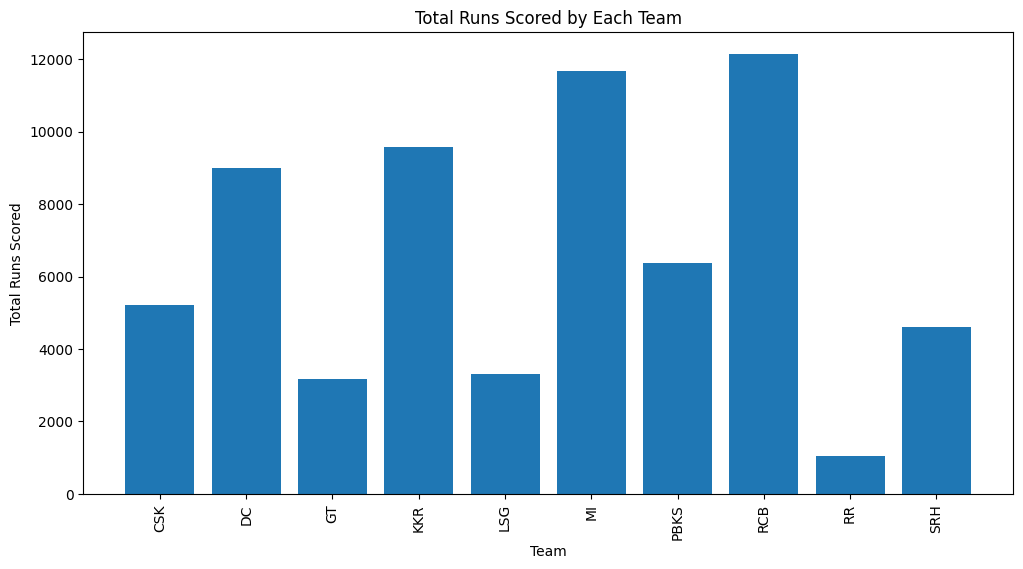

In [64]:
# Plot a bar plot to show the total runs scored by each team
plt.figure(figsize=(12, 6))
plt.bar(team_runs['Team'], team_runs['RunsScored'])
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs Scored')
plt.xticks(rotation=90)
plt.show()


In [65]:
# Count the number of players from each team among the top 10 scorers
team_counts = top_10_scorers['Team'].value_counts()

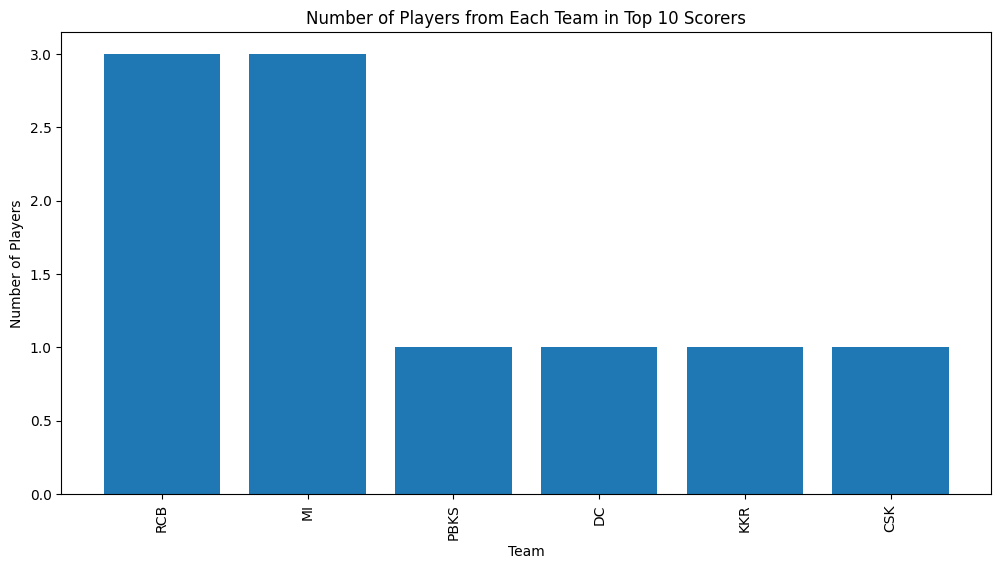

In [67]:
# Plot a bar plot to show the number of players from each team in the top 10
plt.figure(figsize=(12, 6))
plt.bar(team_counts.index, team_counts.values)
plt.title('Number of Players from Each Team in Top 10 Scorers')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.show()

In [117]:
# Sort the bowlers DataFrame by 'Wickets' in descending order
top_bowlers = bowlers.sort_values(by='Wickets', ascending=False).head(10)

# Display the top 10 bowlers with the most wickets
print(top_bowlers[['Full Name', 'Team', 'Wickets', 'ValueinCR']])

                      Full Name  Team  Wickets  ValueinCR
31      Bhuvneshwar Kumar Singh   SRH    142.0       4.20
54       Yuzvendra Singh Chahal    RR    139.0       6.50
96   Jasprit Jasbirsingh Bumrah    MI    130.0      12.00
152      Umeshkumar Tilak Yadav   KKR    119.0       2.00
16               Sandeep Sharma  PBKS    112.0       0.50
214           Rashid Khan Arman    GT     93.0      15.00
106    Jaydev Dipakbhai Unadkat    MI     85.0       1.30
219        Mohammed Shami Ahmed    GT     79.0       6.25
52        Trent Alexander Boult    RR     76.0       8.00
2                 Kagiso Rabada  PBKS     76.0       9.25


In [118]:
# Count the number of players from each team in the top 10
team_counts = top_bowlers['Team'].value_counts().reset_index()
team_counts.columns = ['Team', 'Number of Players']

C:\Users\Faris\AppData\Local\Temp\ipykernel_27488\2763836713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='Number of Players', data=team_counts, palette='viridis')


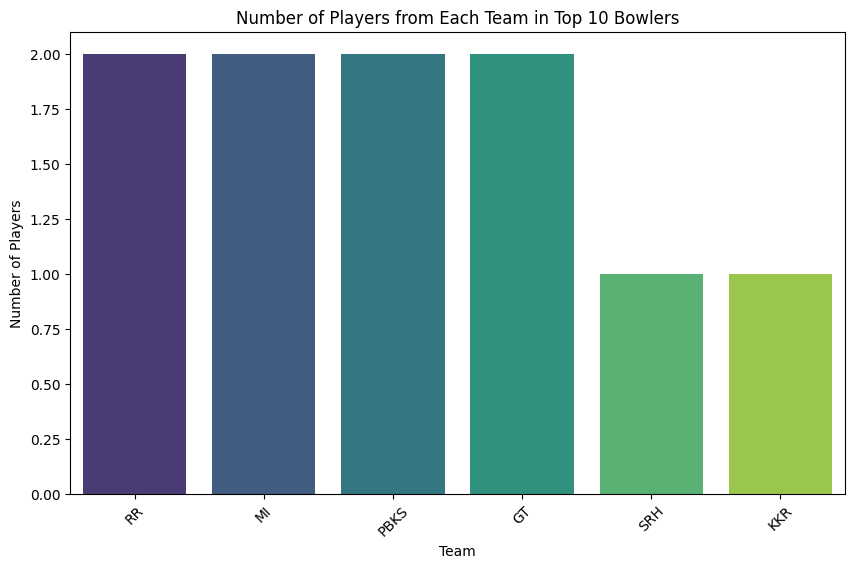

In [119]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Number of Players', data=team_counts, palette='viridis')
plt.title('Number of Players from Each Team in Top 10 Bowlers')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

C:\Users\Faris\AppData\Local\Temp\ipykernel_27488\2993605398.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='Wickets', data=team_wickets, palette='viridis')


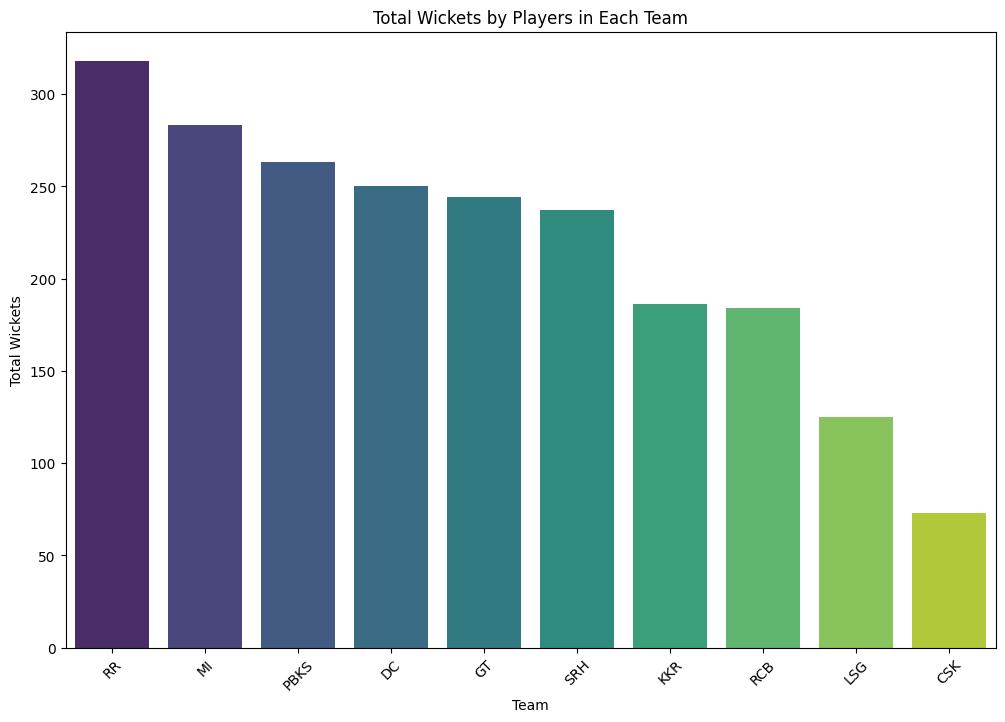

In [120]:
# Group by team and sum the wickets
team_wickets = bowlers.groupby('Team')['Wickets'].sum().reset_index()

# Sort by total wickets for better visualization
team_wickets = team_wickets.sort_values(by='Wickets', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Team', y='Wickets', data=team_wickets, palette='viridis')
plt.title('Total Wickets by Players in Each Team')
plt.xlabel('Team')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.show()

In [114]:
# Filter dataset for each player type

batsmen = df_cleaned[df_cleaned['Type'].str.strip() == 'Batsman']
bowlers = df_cleaned[df_cleaned['Type'].str.strip() == 'Bowler']
all_rounders = df_cleaned[df_cleaned['Type'].str.strip() == 'All-Rounder']

# Calculate MVP for each player type

batsman_mvp = batsmen.loc[batsmen['ValueinCR'].idxmax()]
bowler_mvp = bowlers.loc[bowlers['ValueinCR'].idxmax()]
all_rounder_mvp = all_rounders.loc[all_rounders['ValueinCR'].idxmax()]

In [116]:
# Most Valuable Player according to their player type 

print(f"Batsman MVP: {batsman_mvp['Full Name']} (Team: {batsman_mvp['Team']}, Value: {batsman_mvp['ValueinCR']})")
print(f"Bowler MVP: {bowler_mvp['Full Name']} (Team: {bowler_mvp['Team']}, Value: {bowler_mvp['ValueinCR']})")
print(f"All-Rounder MVP: {all_rounder_mvp['Full Name']} (Team: {all_rounder_mvp['Team']}, Value: {all_rounder_mvp['ValueinCR']})")

Batsman MVP: Rohit Gurunath Sharma (Team: MI, Value: 16.0)
Bowler MVP: Rashid Khan Arman (Team: GT, Value: 15.0)
All-Rounder MVP: Ravindrasinh Anirudhsinh Jadeja (Team: CSK, Value: 16.0)


In [129]:
# Calculate Z-scores for key metrics
df_cleaned.loc[:, 'Runs_Z'] = (df_cleaned['RunsScored'] - df_cleaned['RunsScored'].mean()) / df_cleaned['RunsScored'].std()
df_cleaned.loc[:, 'Wickets_Z'] = (df_cleaned['Wickets'] - df_cleaned['Wickets'].mean()) / df_cleaned['Wickets'].std()


# Define a threshold for Z-score
threshold = 3

# Filter out outliers
df_no_outliers_z = df_cleaned[(df_cleaned['Runs_Z'].abs() <= threshold) & (df_cleaned['Wickets_Z'].abs() <= threshold)]

# Using IQR method
Q1_runs = df_cleaned['RunsScored'].quantile(0.25)
Q3_runs = df_cleaned['RunsScored'].quantile(0.75)
IQR_runs = Q3_runs - Q1_runs

Q1_wickets = df_cleaned['Wickets'].quantile(0.25)
Q3_wickets = df_cleaned['Wickets'].quantile(0.75)
IQR_wickets = Q3_wickets - Q1_wickets

lower_bound_runs = Q1_runs - 1.5 * IQR_runs
upper_bound_runs = Q3_runs + 1.5 * IQR_runs

lower_bound_wickets = Q1_wickets - 1.5 * IQR_wickets
upper_bound_wickets = Q3_wickets + 1.5 * IQR_wickets

df_no_outliers_iqr = df_cleaned[(df_cleaned['RunsScored'] >= lower_bound_runs) & (df_cleaned['RunsScored'] <= upper_bound_runs) &
                                (df_cleaned['Wickets'] >= lower_bound_wickets) & (df_cleaned['Wickets'] <= upper_bound_wickets)]

# Display results
print("Original DataFrame:\n", df_cleaned)
print("\nDataFrame without outliers (Z-score method):\n", df_no_outliers_z)
print("\nDataFrame without outliers (IQR method):\n", df_no_outliers_iqr)


Original DataFrame:
                            Name  Team  \
1              Liam Livingstone  PBKS   
2                 Kagiso Rabada  PBKS   
4                Shikhar Dhawan  PBKS   
7                  Rahul Chahar  PBKS   
8                Arshdeep Singh  PBKS   
...                         ...   ...   
231                 Varun Aaron    GT   
232        Gurkeerat Singh Mann    GT   
236             Pradeep Sangwan    GT   
Runs_Z                      NaN   NaN   
Wickets_Z                   NaN   NaN   

                                                         Url          Type  \
1          https://sports.ndtv.com/cricket/players/64363-...  All-Rounder    
2          https://sports.ndtv.com/cricket/players/64042-...       Bowler    
4          https://sports.ndtv.com/cricket/players/737-sh...      Batsman    
7          https://sports.ndtv.com/cricket/players/107512...       Bowler    
8          https://sports.ndtv.com/cricket/players/108557...       Bowler    
...               

In [137]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer



Original DataFrame:
                            Name  Team  \
1              Liam Livingstone  PBKS   
2                 Kagiso Rabada  PBKS   
4                Shikhar Dhawan  PBKS   
7                  Rahul Chahar  PBKS   
8                Arshdeep Singh  PBKS   
...                         ...   ...   
231                 Varun Aaron    GT   
232        Gurkeerat Singh Mann    GT   
236             Pradeep Sangwan    GT   
Runs_Z                      NaN   NaN   
Wickets_Z                   NaN   NaN   

                                                         Url          Type  \
1          https://sports.ndtv.com/cricket/players/64363-...  All-Rounder    
2          https://sports.ndtv.com/cricket/players/64042-...       Bowler    
4          https://sports.ndtv.com/cricket/players/737-sh...      Batsman    
7          https://sports.ndtv.com/cricket/players/107512...       Bowler    
8          https://sports.ndtv.com/cricket/players/108557...       Bowler    
...               

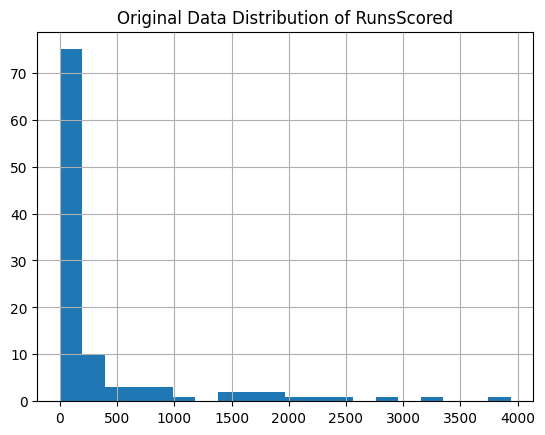

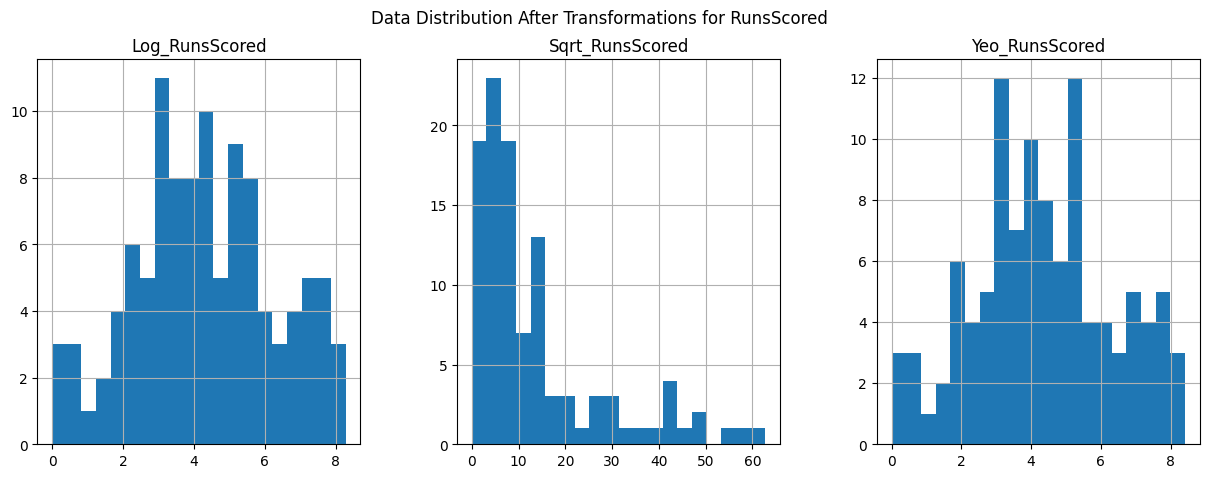

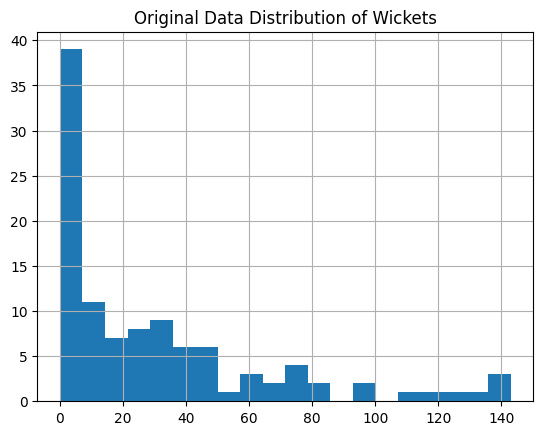

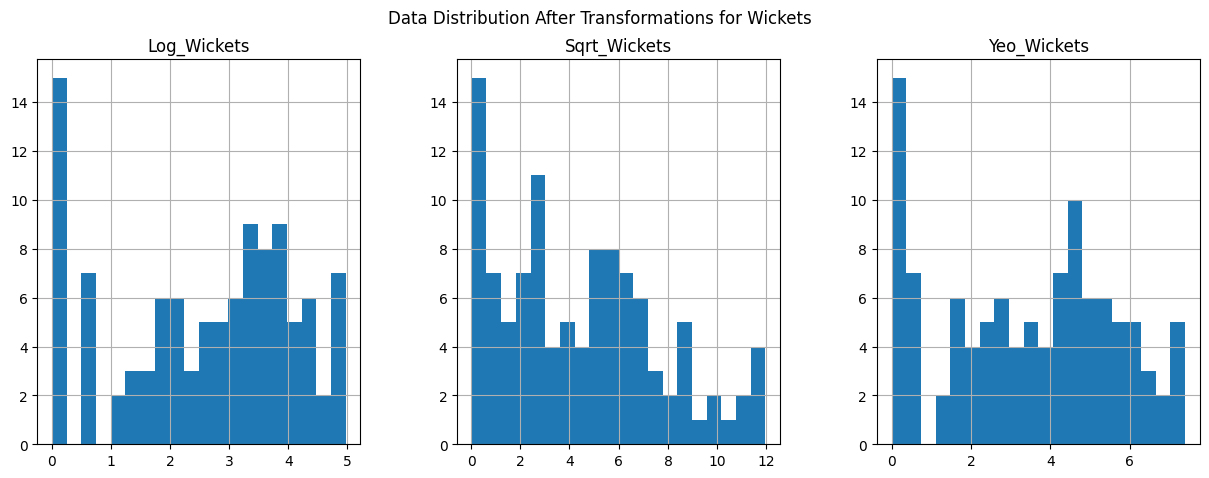

In [162]:
# Calculate Z-scores for key metrics
df_cleaned.loc[:, 'RunsScored_Z'] = (df_cleaned['RunsScored'] - df_cleaned['RunsScored'].mean()) / df_cleaned['RunsScored'].std()
df_cleaned.loc[:, 'Wickets_Z'] = (df_cleaned['Wickets'] - df_cleaned['Wickets'].mean()) / df_cleaned['Wickets'].std()

# Define a threshold for Z-score
threshold = 3

# Filter out outliers
df_no_outliers_z = df_cleaned[(df_cleaned['RunsScored_Z'].abs() <= threshold) & (df_cleaned['Wickets_Z'].abs() <= threshold)].copy()

# Display results
print("Original DataFrame:\n", df_cleaned)
print("\nDataFrame without outliers (Z-score method):\n", df_no_outliers_z)

# Define skewed features
skewed_features = ['RunsScored', 'Wickets']

# Apply transformations and visualize
for feature in skewed_features:
    # Visualize the data distribution before transformation
    df_no_outliers_z[feature].hist(bins=20)
    plt.title(f'Original Data Distribution of {feature}')
    plt.show()

    # Apply log transformation
    df_no_outliers_z['Log_' + feature] = np.log(df_no_outliers_z[feature] + 1)  # Adding 1 to avoid log(0)

    # Apply square root transformation
    df_no_outliers_z['Sqrt_' + feature] = np.sqrt(df_no_outliers_z[feature])

    # Apply Yeo-Johnson transformation (sklearn's PowerTransformer can handle both positive and negative values)
    pt = PowerTransformer(method='yeo-johnson', standardize=False)
    df_no_outliers_z['Yeo_' + feature] = pt.fit_transform(df_no_outliers_z[[feature]])

    # Visualize the data distribution after transformation
    df_no_outliers_z[['Log_' + feature, 'Sqrt_' + feature, 'Yeo_' + feature]].hist(bins=20, layout=(1, 3), figsize=(15, 5))
    plt.suptitle(f'Data Distribution After Transformations for {feature}')
    plt.show()

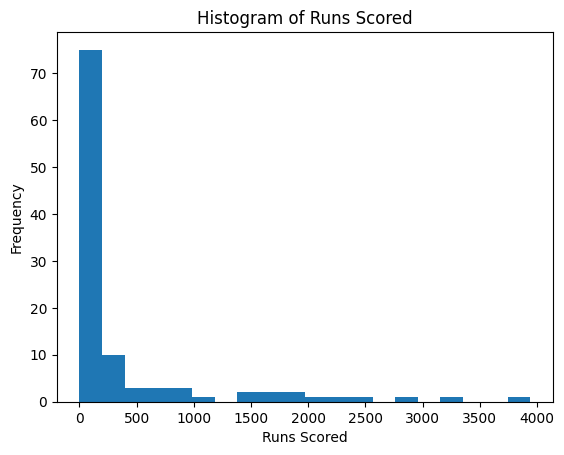

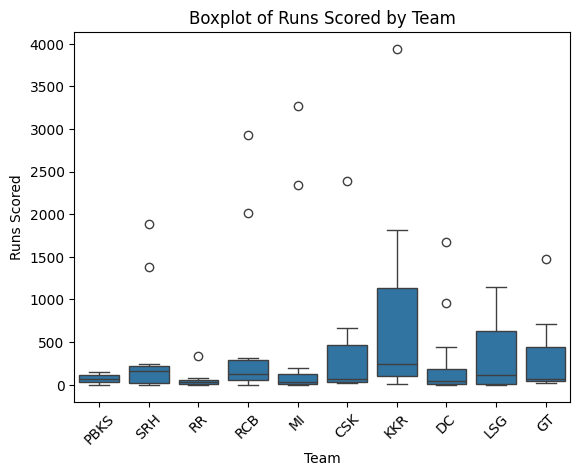

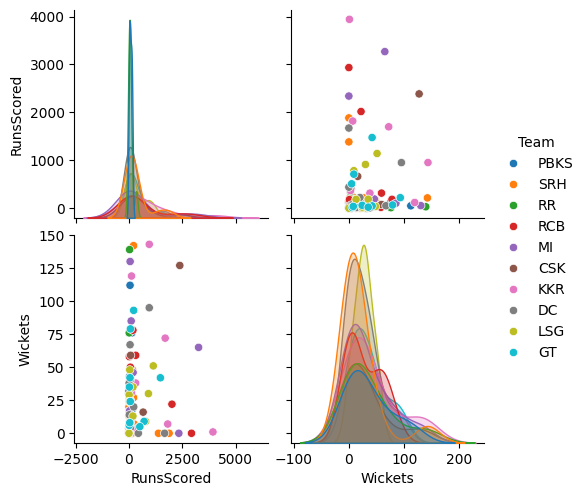

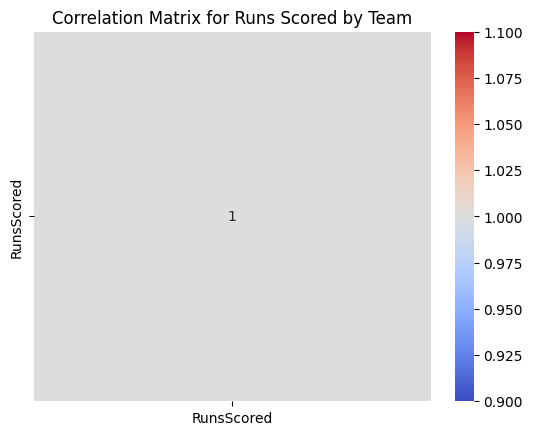

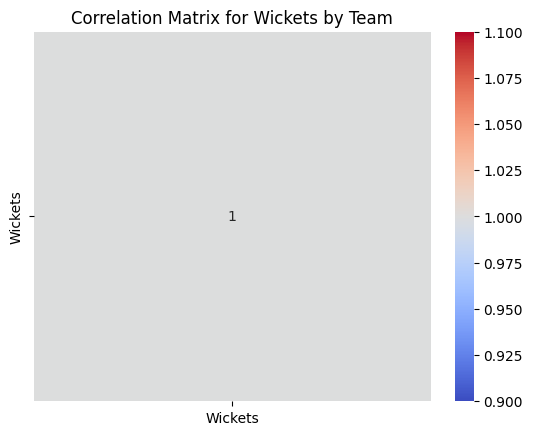

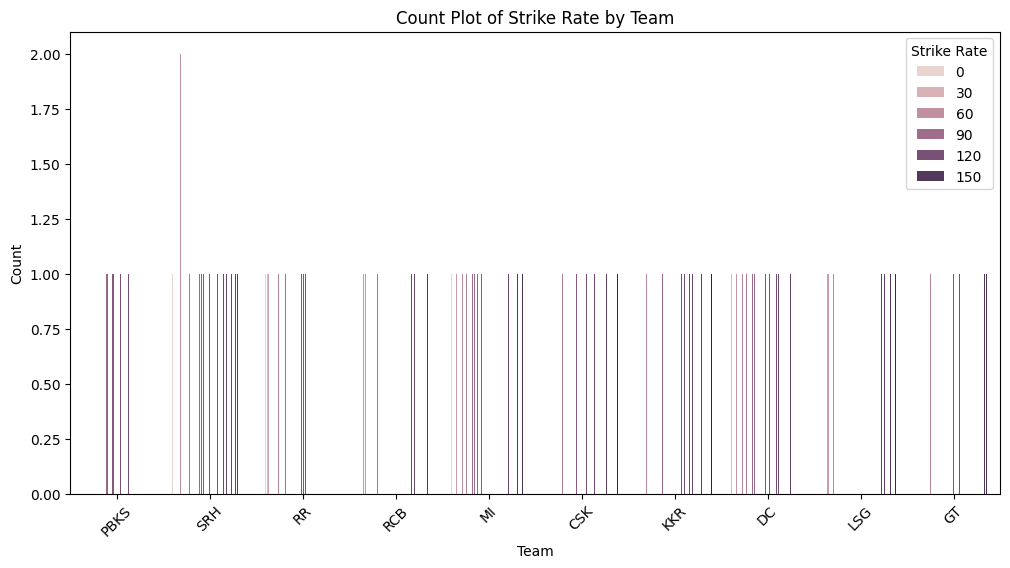

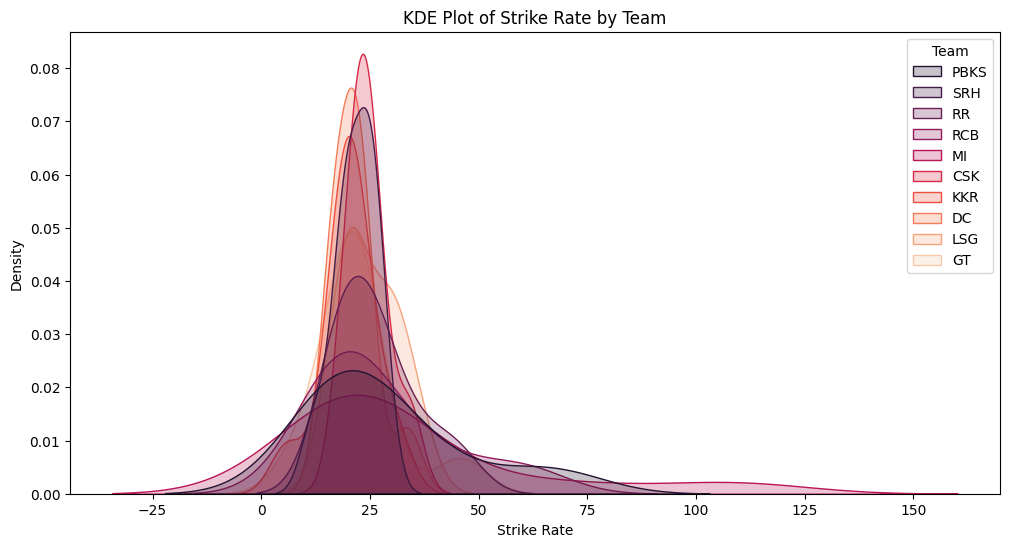

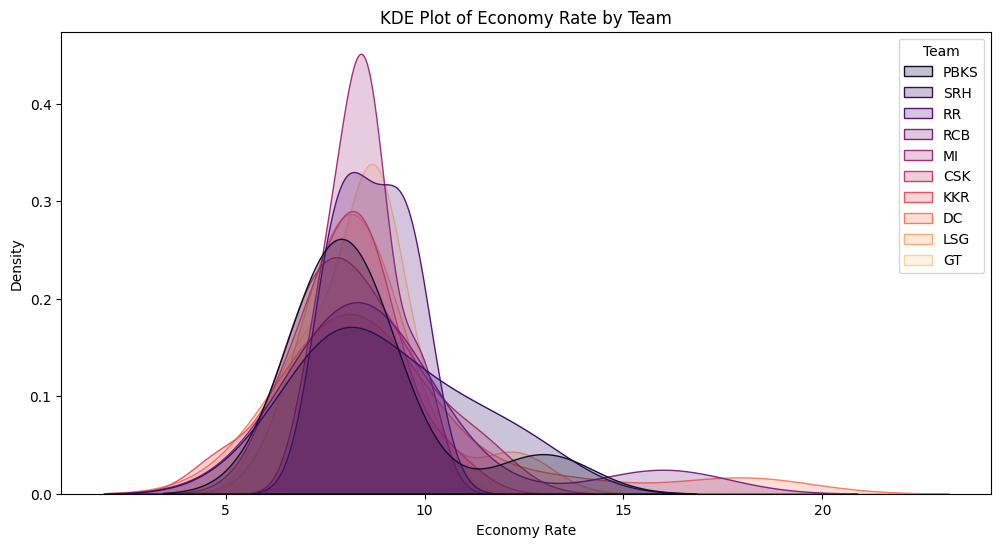

In [177]:
# Histogram
plt.hist(df_no_outliers_z['RunsScored'], bins=20)
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.title('Histogram of Runs Scored')
plt.show()

# Boxplot
sns.boxplot(x='Team', y='RunsScored', data=df_no_outliers_z)
plt.xlabel('Team')
plt.ylabel('Runs Scored')
plt.title('Boxplot of Runs Scored by Team')
plt.xticks(rotation=45)
plt.show()

# Pair Plot
sns.pairplot(df_no_outliers_z[['RunsScored', 'Wickets', 'Team']], hue='Team')
plt.show()

# Correlation matrix for Runs Scored by Team
corr_runs_team = df_no_outliers_z.pivot_table(index='Team', values='RunsScored', aggfunc='mean').corr()
sns.heatmap(corr_runs_team, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Runs Scored by Team')
plt.show()

# Correlation matrix for Wickets by Team
corr_wickets_team = df_no_outliers_z.pivot_table(index='Team', values='Wickets', aggfunc='mean').corr()
sns.heatmap(corr_wickets_team, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Wickets by Team')
plt.show()

# Count Plot for Strike Rate by Team
plt.figure(figsize=(12, 6))
sns.countplot(x='Team', hue='BattingS/R', data=df_no_outliers_z)
plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Count Plot of Strike Rate by Team')
plt.xticks(rotation=45)
plt.legend(title='Strike Rate')
plt.show()

# KDE Plot for Strike Rate
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_no_outliers_z, x='S/R', hue='Team', fill=True, common_norm=False, palette='rocket')
plt.xlabel('Strike Rate')
plt.ylabel('Density')
plt.title('KDE Plot of Strike Rate by Team')
plt.show()

# KDE Plot for Economy Rate
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_no_outliers_z, x='EconomyRate', hue='Team', fill=True, common_norm=False, palette='magma')
plt.xlabel('Economy Rate')
plt.ylabel('Density')
plt.title('KDE Plot of Economy Rate by Team')
plt.show()

In [169]:
print(df_no_outliers_z.columns)

Index(['Name', 'Team', 'Url', 'Type', 'ValueinCR', 'Full Name', 'Born', 'Age',
       'National Side', 'Batting Style', 'Bowling', 'Sport', 'MatchPlayed',
       'InningsBatted', 'NotOuts', 'RunsScored', 'HighestInnScore', '100s',
       '50s', '4s', '6s', 'BattingAVG', 'BattingS/R', 'CatchesTaken',
       'StumpingsMade', 'Ducks', 'R/O', 'InningsBowled', 'Overs', 'Maidens',
       'RunsConceded', 'Wickets', 'Best', '3s', '5s', 'BowlingAVG',
       'EconomyRate', 'S/R', 'Mtc', 'Runs_Z', 'Wickets_Z', 'Log_RunsScored',
       'Sqrt_RunsScored', 'Yeo_RunsScored', 'Log_Wickets', 'Sqrt_Wickets',
       'RunsScored_Z', 'Yeo_Wickets'],
      dtype='object')


In [183]:
match_data=pd.read_csv("C:\\Users\\Faris\\Downloads\\matches.csv")

In [187]:
print(match_data.columns)


Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')


In [195]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

# Assuming match_data is your DataFrame
df = match_data

# Features and target
X = match_data.drop(columns='match_winner')
y = match_data['match_winner']

# Remove constant features
constant_features = df.columns[df.nunique() == 1]
X = X.drop(columns=constant_features)

# Preprocessing pipelines for numeric and categorical features
numeric_features = ['first_ings_score', 'first_ings_wkts', 'second_ings_score', 'second_ings_wkts', 'margin', 'highscore']
categorical_features = [col for col in X.columns if col not in numeric_features and col != 'match_id']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('var_thresh', VarianceThreshold())  # Filter out low-variance features
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Pipeline
select_k_best = SelectKBest(score_func=f_classif, k=10)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('select_k_best', select_k_best),
    ('random_forest', random_forest)
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Get feature importances
importances = pipeline.named_steps['random_forest'].feature_importances_

# Print feature importances
print("Feature importances:", importances)


Feature importances: [0.12790148 0.08844215 0.12792427 0.1497984  0.07507663 0.13868555
 0.09807717 0.06549466 0.0219726  0.1066271 ]


In [196]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming match_data is your DataFrame
df = match_data

# Features and target
X = match_data.drop(columns='match_winner')
y = match_data['match_winner']

# Remove constant features
constant_features = df.columns[df.nunique() == 1]
X = X.drop(columns=constant_features)

# Preprocessing pipelines for numeric and categorical features
numeric_features = ['first_ings_score', 'first_ings_wkts', 'second_ings_score', 'second_ings_wkts', 'margin', 'highscore']
categorical_features = [col for col in X.columns if col not in numeric_features and col != 'match_id']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('var_thresh', VarianceThreshold())  # Filter out low-variance features
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Pipeline
select_k_best = SelectKBest(score_func=f_classif, k=10)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('select_k_best', select_k_best),
    ('random_forest', random_forest)
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Get feature importances
importances = pipeline.named_steps['random_forest'].feature_importances_

# Print feature importances
print("Feature importances:", importances)


Feature importances: [0.12790148 0.08844215 0.12792427 0.1497984  0.07507663 0.13868555
 0.09807717 0.06549466 0.0219726  0.1066271 ]


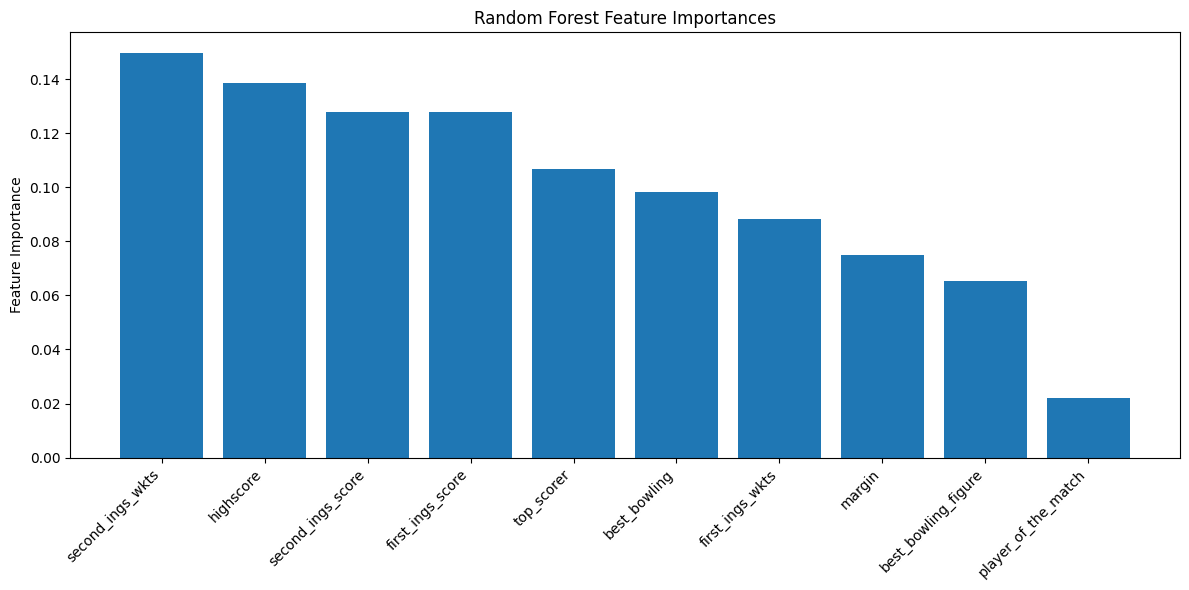

In [197]:
import matplotlib.pyplot as plt

# Feature importances
importances = [0.12790148, 0.08844215, 0.12792427, 0.1497984, 0.07507663, 0.13868555, 0.09807717, 0.06549466, 0.0219726, 0.1066271]
features = ['first_ings_score', 'first_ings_wkts', 'second_ings_score', 'second_ings_wkts', 'margin', 'highscore', 'best_bowling', 'best_bowling_figure', 'player_of_the_match', 'top_scorer']

# Sort features by importance
sorted_indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
sorted_importances = [importances[i] for i in sorted_indices]
sorted_features = [features[i] for i in sorted_indices]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), sorted_importances, align='center')
plt.xticks(range(len(importances)), sorted_features, rotation=45, ha='right')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()


In [207]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Fit the pipeline
X_preprocessed = preprocessor.fit_transform(X)

# Get the column indices of the numeric features
numeric_feature_indices = [X.columns.get_loc(col) for col in numeric_features]

# Extract the numeric features from the preprocessed data
X_numeric_preprocessed = X_preprocessed[:, numeric_feature_indices]

# Convert sparse matrix to dense array
X_numeric_preprocessed_dense = X_numeric_preprocessed.toarray()

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
X_min_max_scaled = min_max_scaler.fit_transform(X_numeric_preprocessed_dense)

# Standardization
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X_numeric_preprocessed_dense)



In [209]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standard_scaled, y, test_size=0.2, random_state=42)


In [227]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import numpy as np

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('match_winner', axis=1), df['match_winner'], test_size=0.2, random_state=42)

# Encoding the target variable for regression models
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Assuming 'team1' and 'team2' are categorical columns, and other columns are numeric
categorical_cols = ['team1', 'team2']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols and X_train[col].dtype != 'object']

# Create a preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "MLP Classifier": MLPClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Adaboost": AdaBoostClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', classifier)])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {score}")

# Initialize regressors
regressors = {
    "SVR": SVR(),
    "MLP Regressor": MLPRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boost": GradientBoostingRegressor(),
    "Adaboost": AdaBoostRegressor(),
    "Linear Regression": LinearRegression()
}

# Train and evaluate each regressor
for name, regressor in regressors.items():
    model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', regressor)])
    model.fit(X_train, y_train_encoded)  # Use y_train_encoded here
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test_encoded, y_pred)
    print(f"{name} - R^2 Score: {r2}")


C:\Users\Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Logistic Regression - Accuracy: 0.13333333333333333
SVM - Accuracy: 0.13333333333333333
Decision Tree - Accuracy: 0.6
MLP Classifier - Accuracy: 0.2
Naive Bayes - Accuracy: 0.4666666666666667
Random Forest - Accuracy: 0.5333333333333333
Gradient Boost - Accuracy: 0.7333333333333333
Adaboost - Accuracy: 0.26666666666666666
K-Nearest Neighbors - Accuracy: 0.06666666666666667
SVR - R^2 Score: -0.007762916103998041
MLP Regressor - R^2 Score: -5.712544356169771


C:\Users\Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Random Forest Regressor - R^2 Score: 0.39657055353902004
Gradient Boost - R^2 Score: 0.4388089473682736
Adaboost - R^2 Score: 0.39231877459211495
Linear Regression - R^2 Score: 0.02924848525492385


In [228]:
from sklearn.metrics import f1_score

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "MLP Classifier": MLPClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Adaboost": AdaBoostClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', classifier)])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate F1-score
    print(f"{name} - F1-Score: {f1}")


C:\Users\Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Logistic Regression - F1-Score: 0.12000000000000001
SVM - F1-Score: 0.048484848484848485
Decision Tree - F1-Score: 0.46984126984126984
MLP Classifier - F1-Score: 0.2015873015873016
Naive Bayes - F1-Score: 0.4522222222222222
Random Forest - F1-Score: 0.7200000000000001
Gradient Boost - F1-Score: 0.8425396825396826
Adaboost - F1-Score: 0.17222222222222222
K-Nearest Neighbors - F1-Score: 0.08000000000000002


C:\Users\Faris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


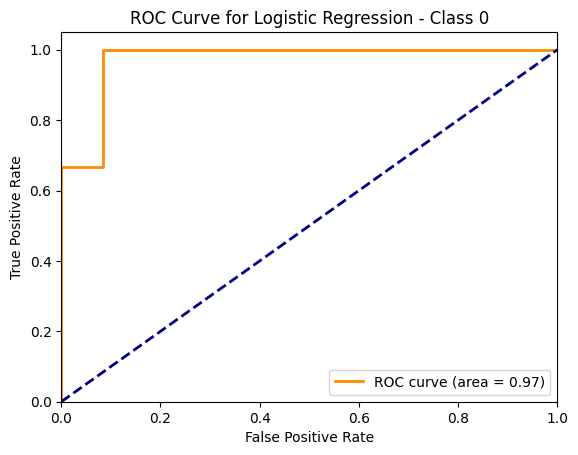

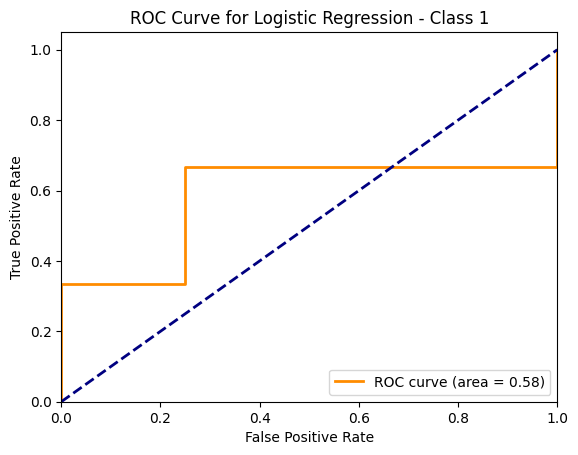

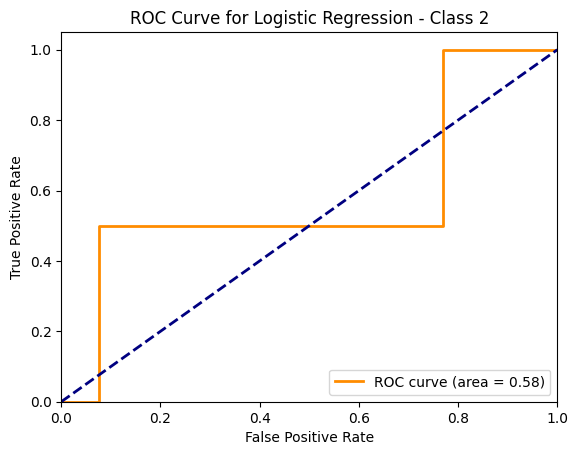

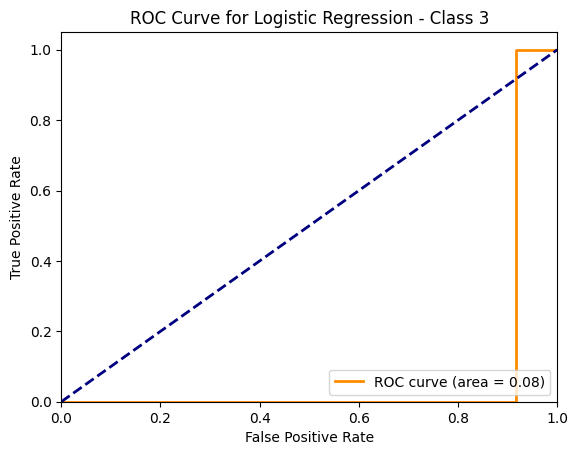

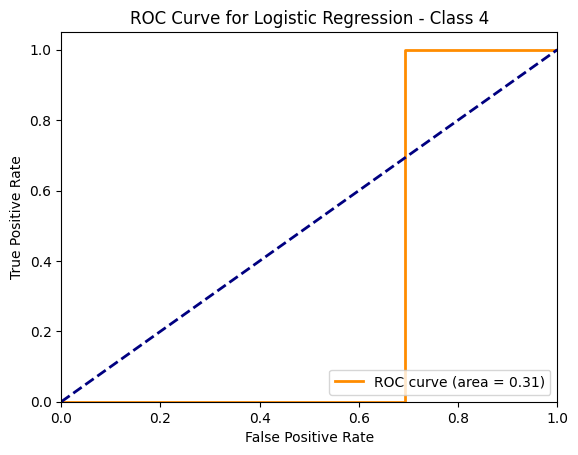

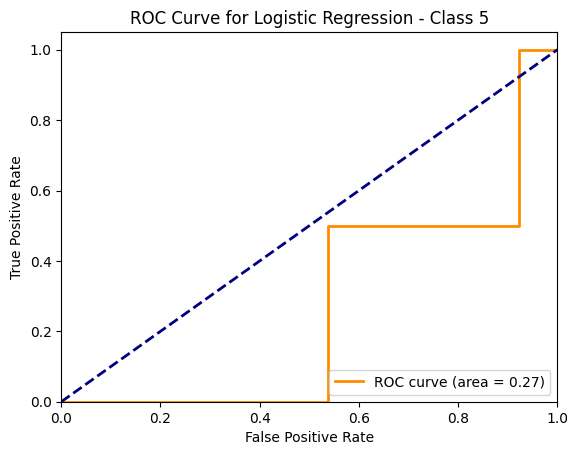

Logistic Regression - Best Parameters: {'classifier__C': 1, 'classifier__max_iter': 100}
Logistic Regression - Best Accuracy: 0.42884990253411304


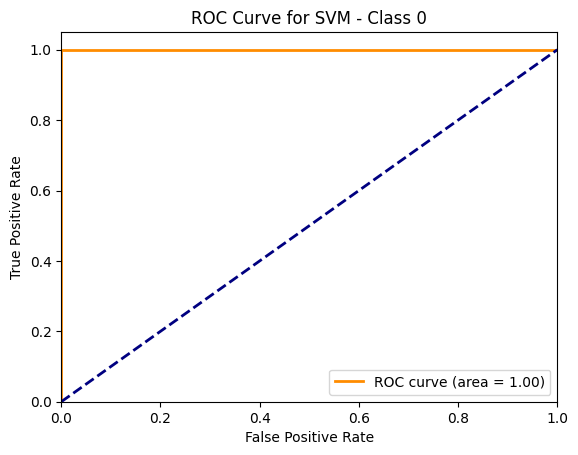

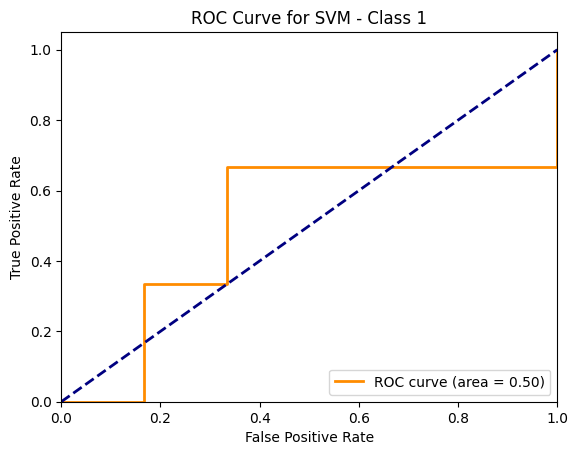

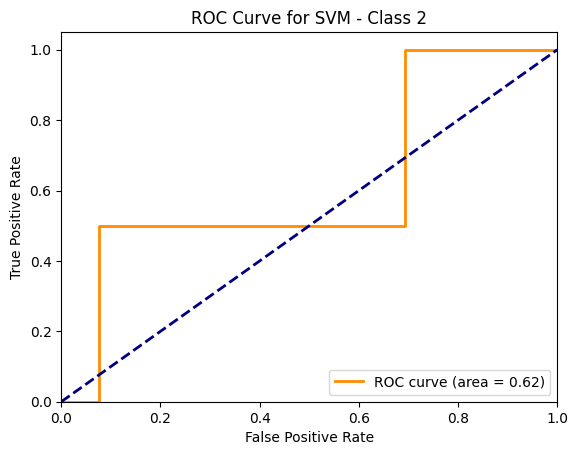

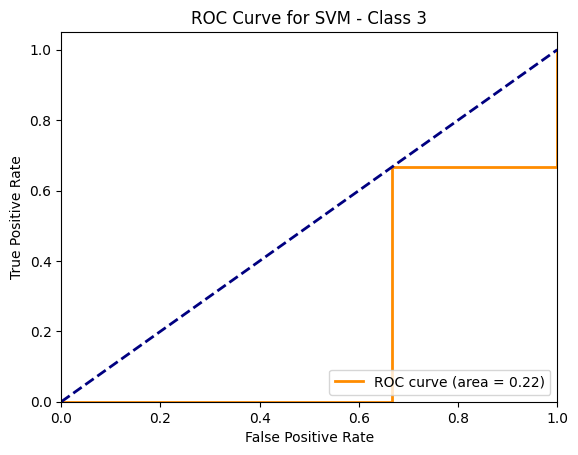

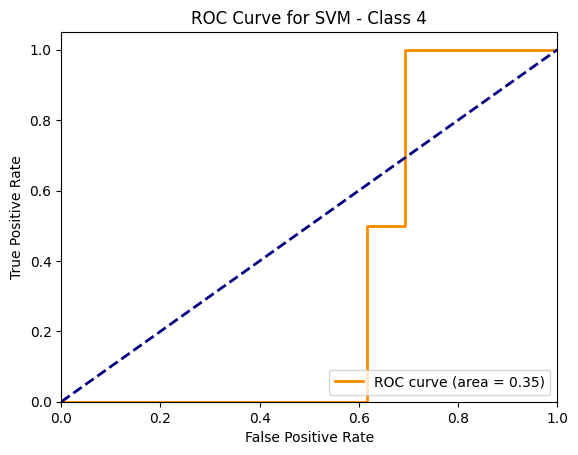

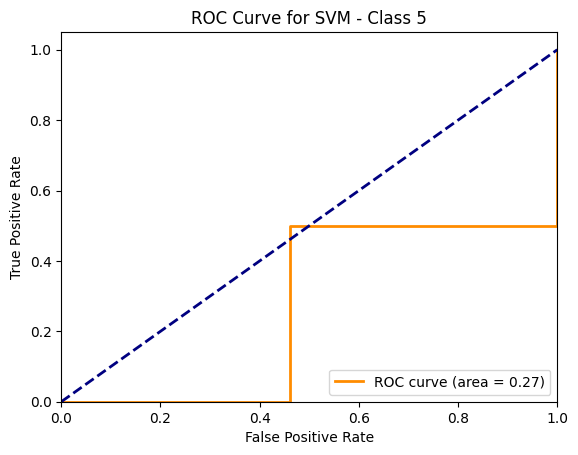

SVM - Best Parameters: {'classifier__C': 1, 'classifier__kernel': 'linear'}
SVM - Best Accuracy: 0.4278752436647173


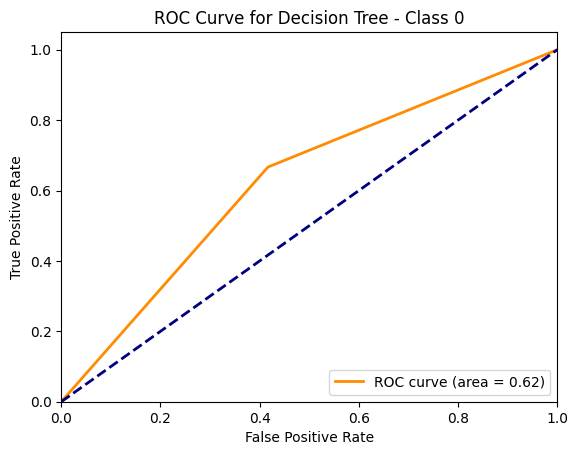

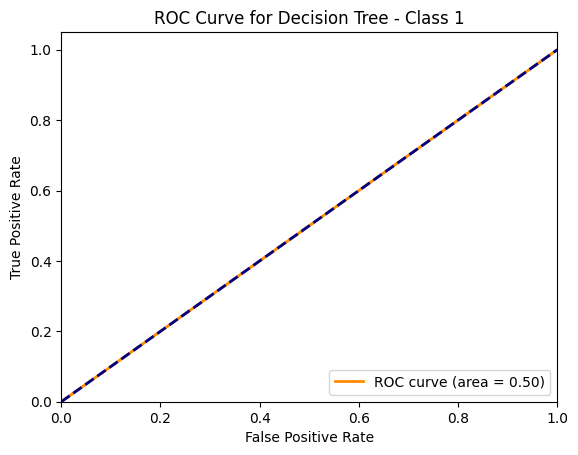

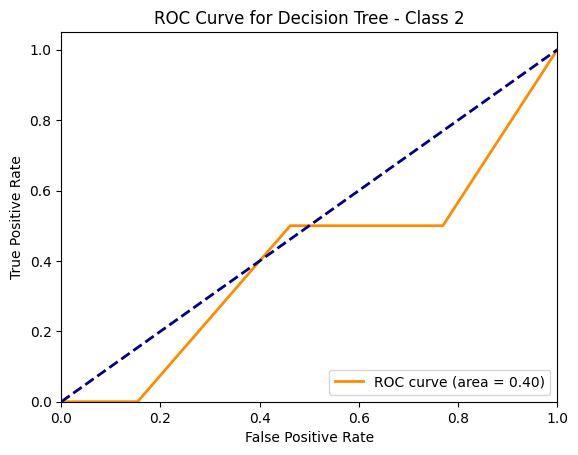

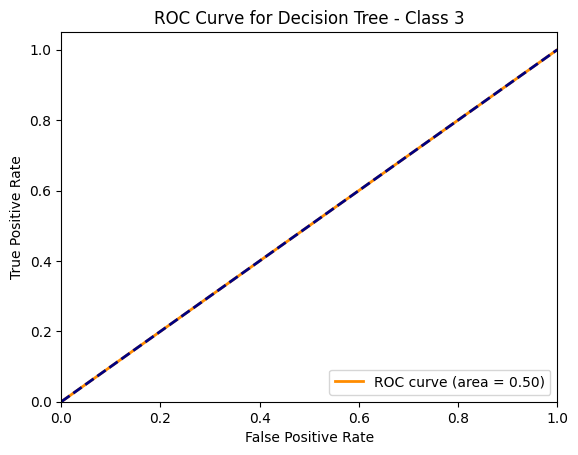

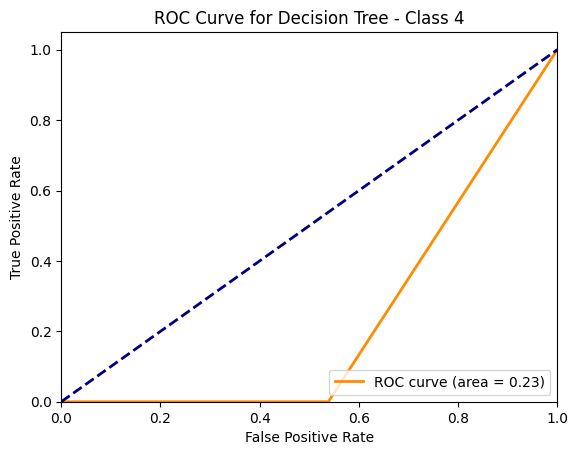

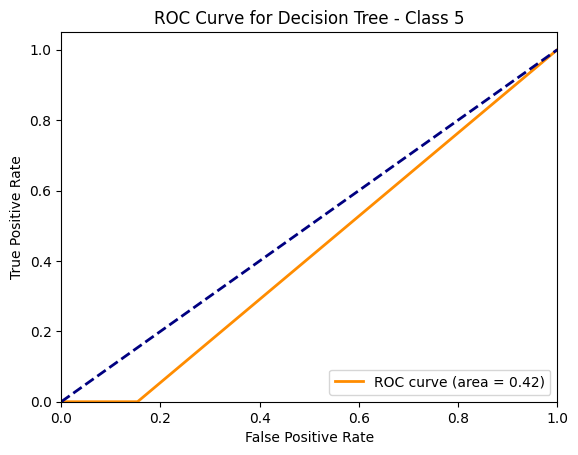

Decision Tree - Best Parameters: {'classifier__max_depth': 7, 'classifier__min_samples_split': 10}
Decision Tree - Best Accuracy: 0.48245614035087714


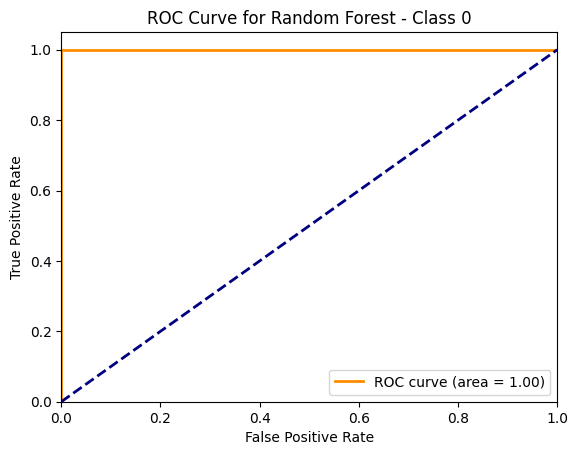

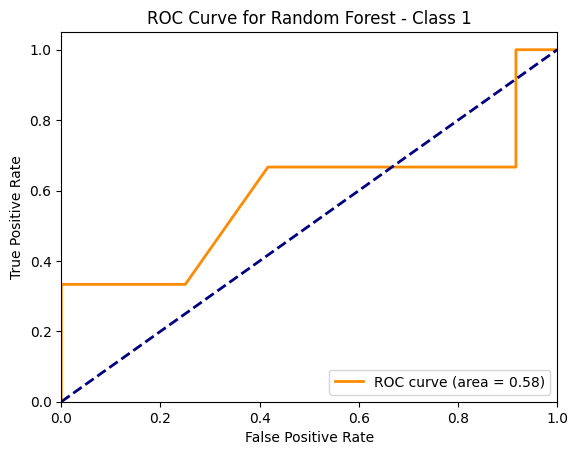

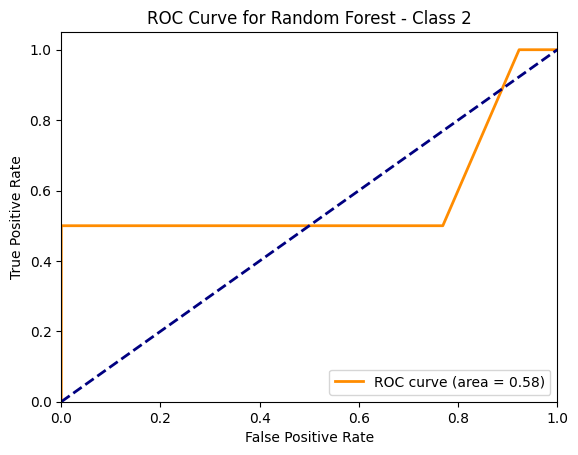

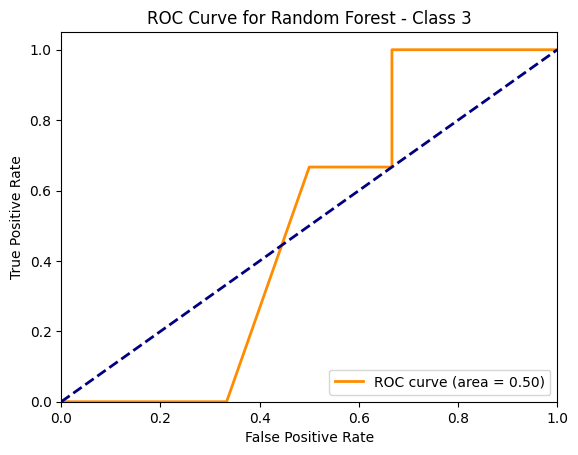

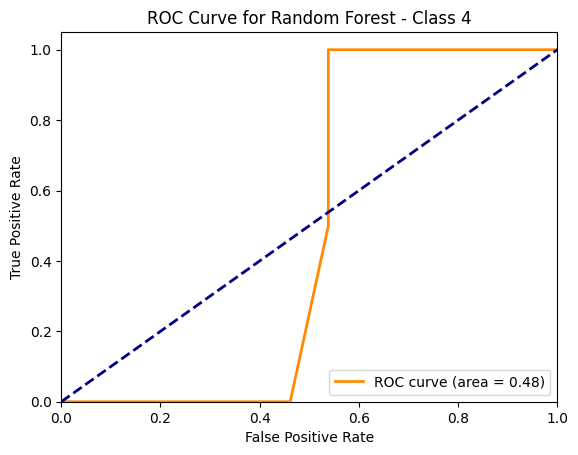

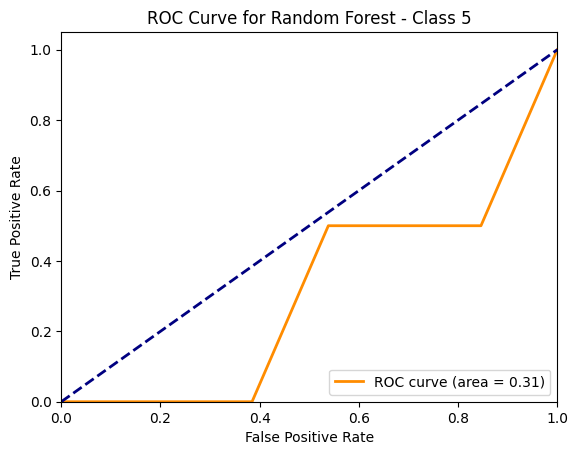

Random Forest - Best Parameters: {'classifier__max_depth': 20, 'classifier__n_estimators': 50}
Random Forest - Best Accuracy: 0.5360623781676414


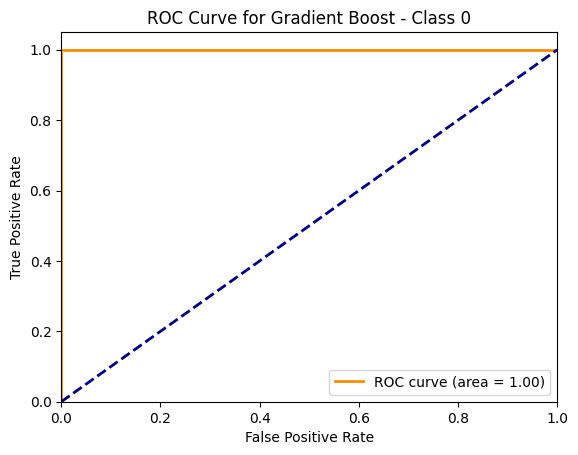

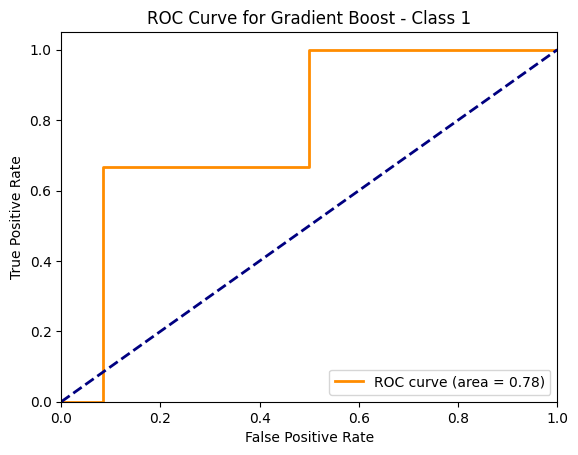

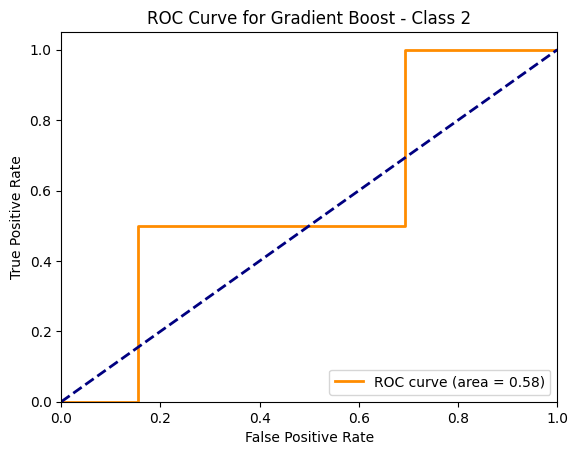

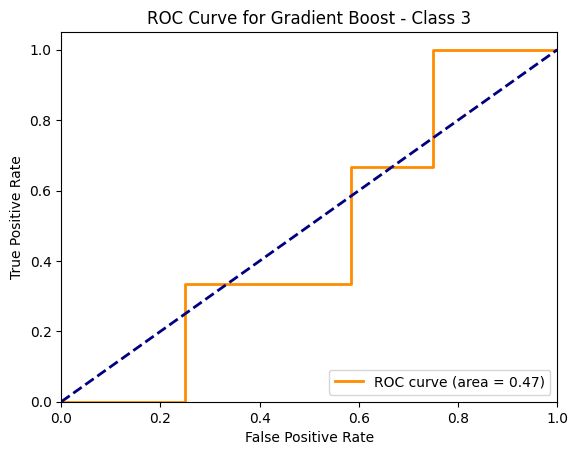

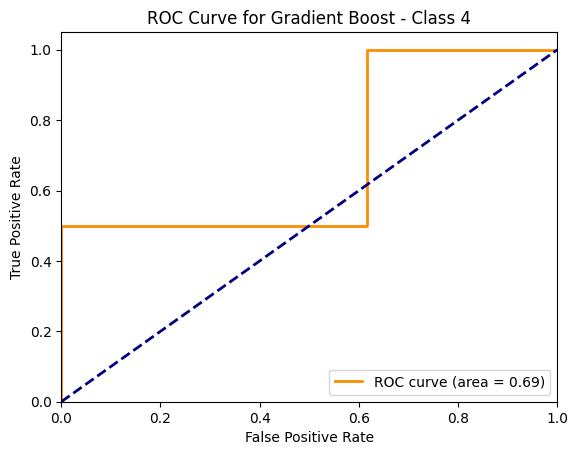

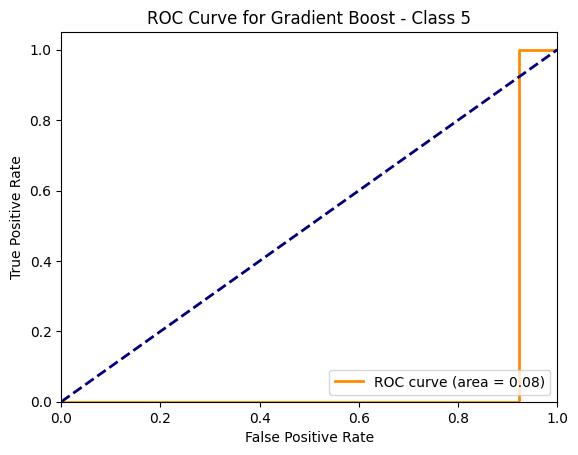

Gradient Boost - Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50}
Gradient Boost - Best Accuracy: 0.47953216374269


In [249]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Replace these with your actual feature names
numerical_features = ['first_ings_score', 'first_ings_wkts', 'second_ings_score', 'second_ings_wkts']  # Example numerical features
categorical_features = ['venue', 'team1', 'team2', 'stage', 'toss_winner', 'toss_decision']  # Example categorical features

# Preprocessor for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=5000),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier()
}

# Define hyperparameters grid for each classifier
param_grids = {
    "Logistic Regression": {
        'classifier__C': [0.1, 1, 10],
        'classifier__max_iter': [100, 200, 300]
    },
    "SVM": {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    "Decision Tree": {
        'classifier__max_depth': [3, 5, 7],
        'classifier__min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    "Gradient Boost": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    },
}

# Use StratifiedKFold with fewer splits
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Train and evaluate each classifier with GridSearchCV
for name, classifier in classifiers.items():
    if name in param_grids:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', classifier)])
        grid_search = GridSearchCV(pipeline, param_grids[name], cv=cv, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        y_score = best_model.predict_proba(X_test)
        
        # Convert y_test to binary format
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

        # Plot ROC Curve for each class
        for i in range(y_test_bin.shape[1]):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            
            plt.figure()
            lw = 2
            plt.plot(fpr, tpr, color='darkorange',
                     lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
            plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve for {name} - Class {i}')
            plt.legend(loc="lower right")
            plt.show()
        
        print(f"{name} - Best Parameters: {grid_search.best_params_}")
        print(f"{name} - Best Accuracy: {grid_search.best_score_}")
    else:
        print(f"{name} - No hyperparameter grid defined.")


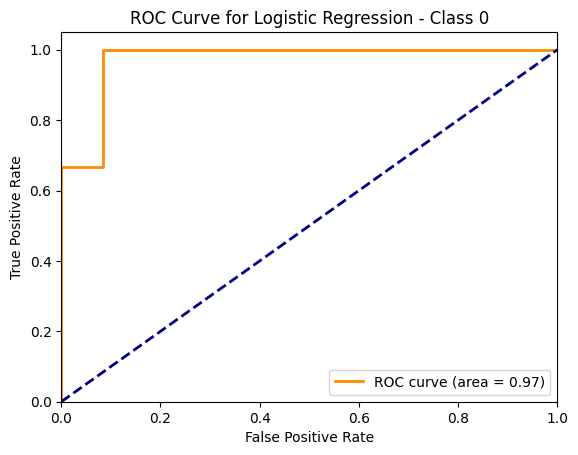

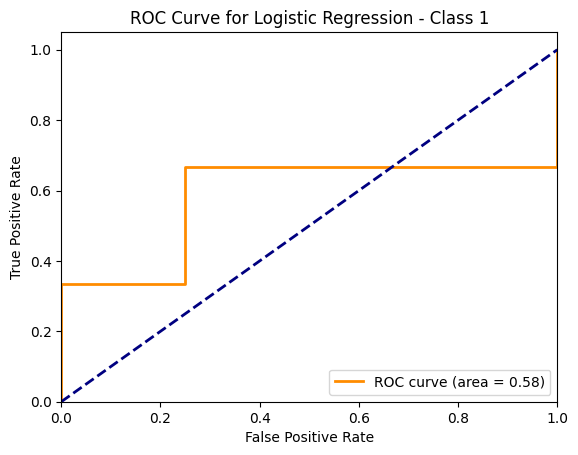

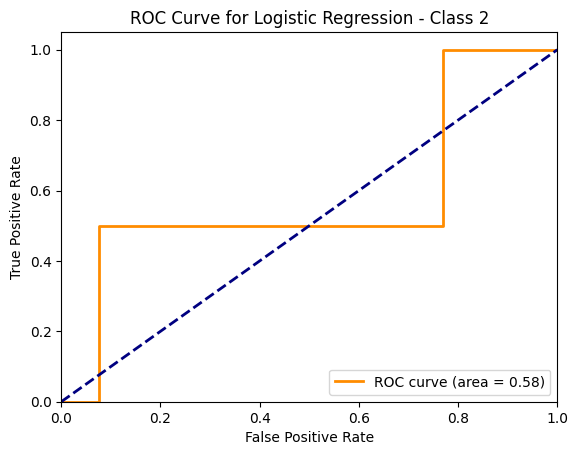

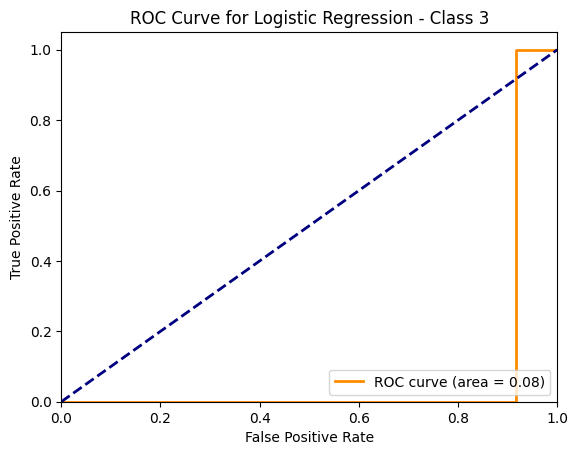

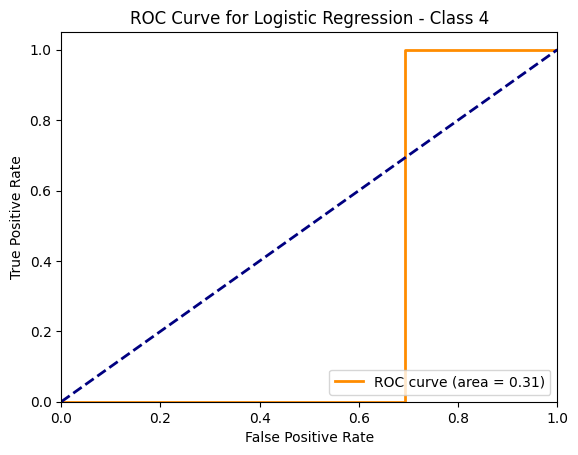

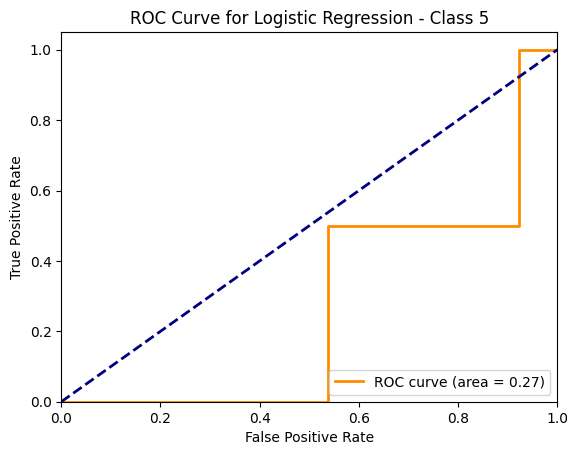

Logistic Regression - Best Parameters: {'classifier__C': 1, 'classifier__max_iter': 100}
Logistic Regression - Best Accuracy: 0.42884990253411304


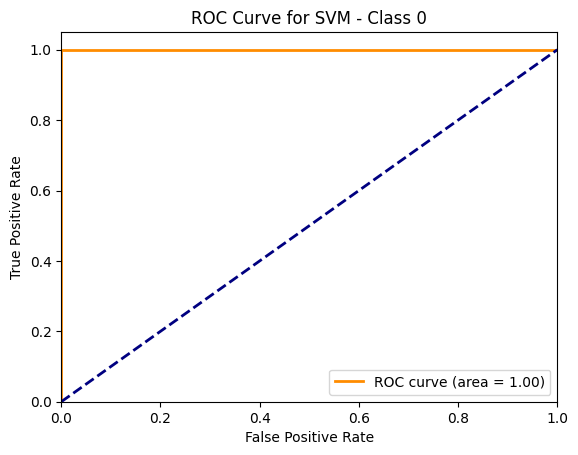

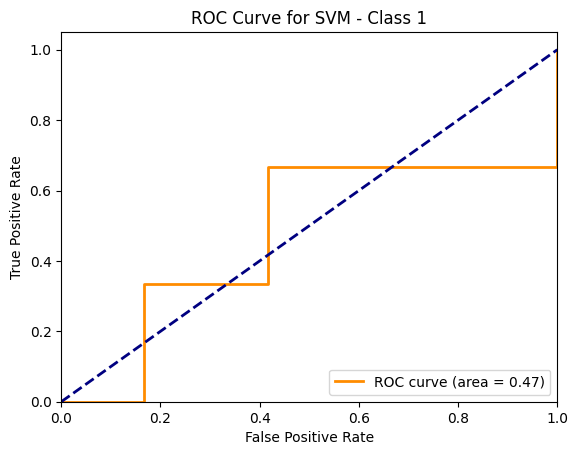

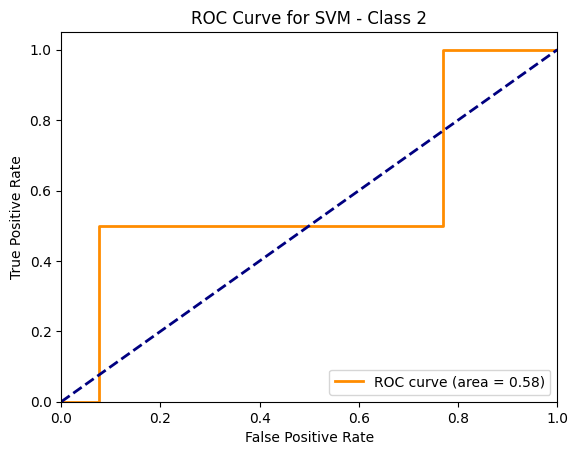

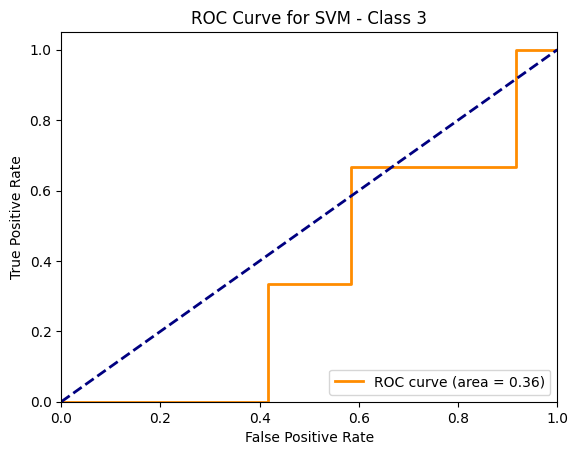

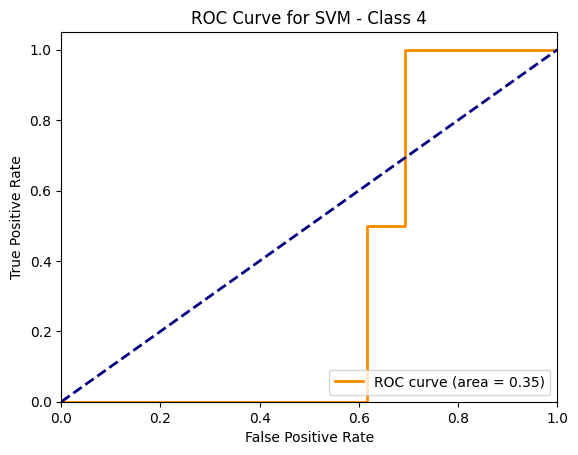

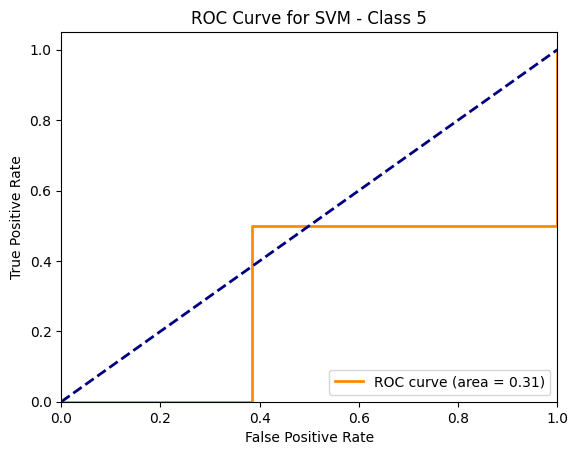

SVM - Best Parameters: {'classifier__C': 1, 'classifier__kernel': 'linear'}
SVM - Best Accuracy: 0.4278752436647173


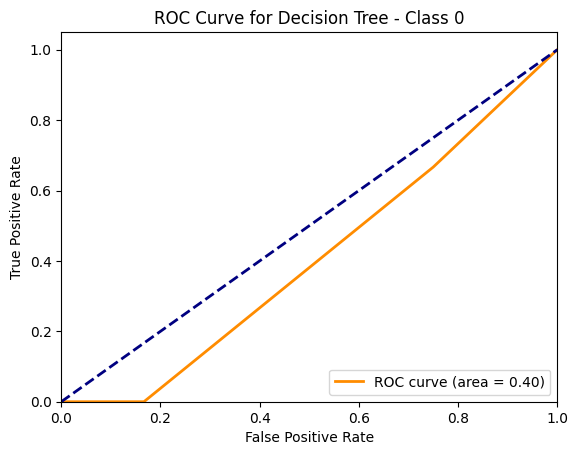

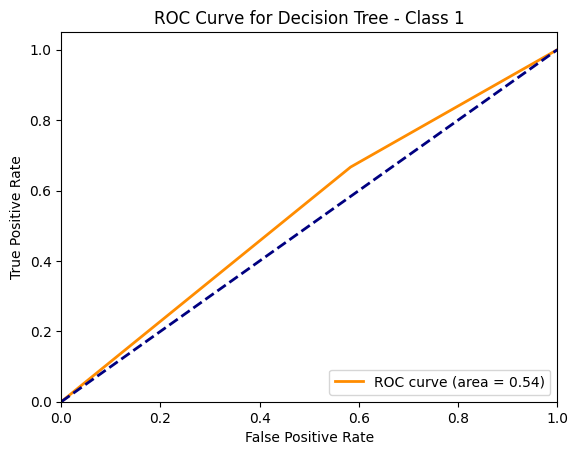

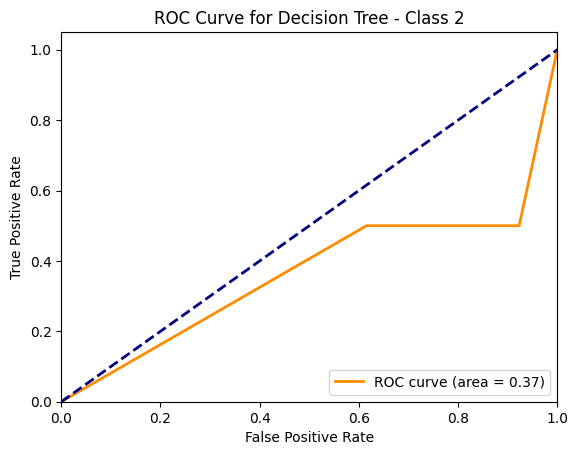

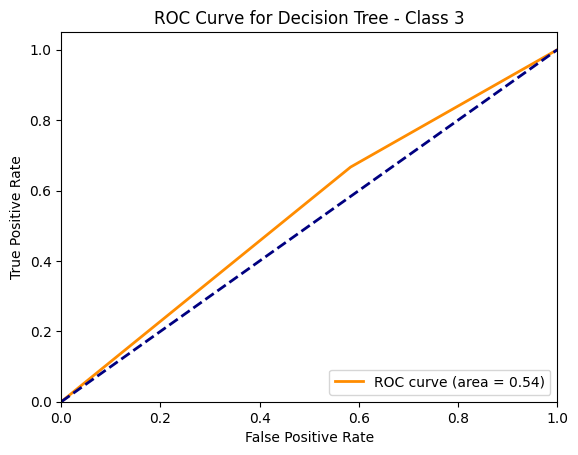

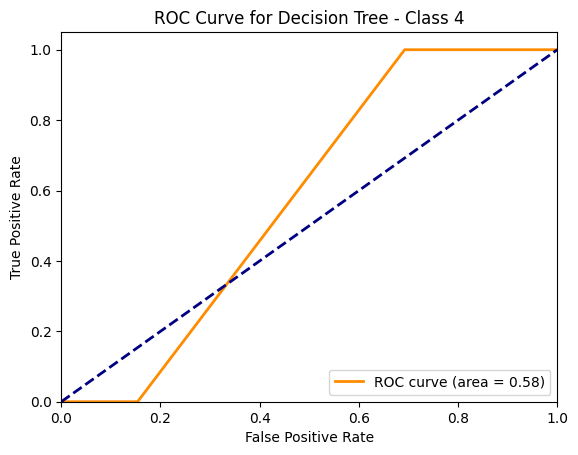

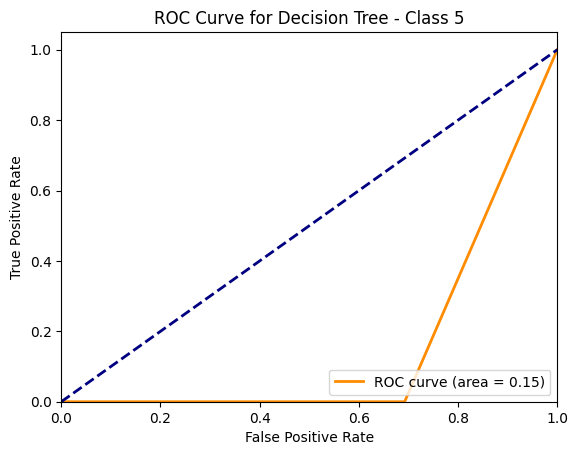

Decision Tree - Best Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 10}
Decision Tree - Best Accuracy: 0.42884990253411304


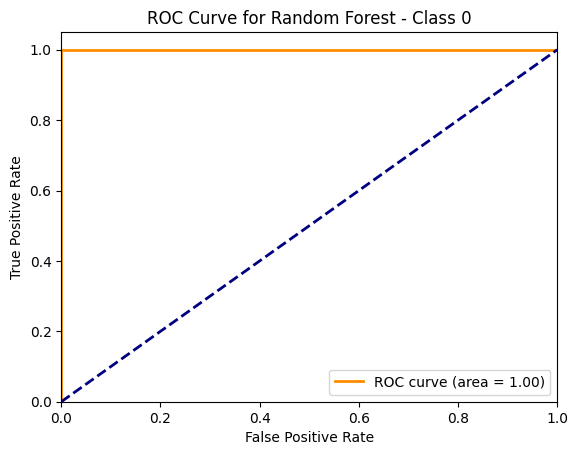

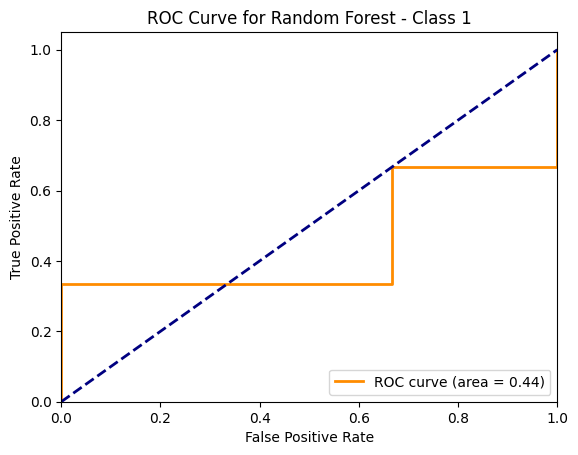

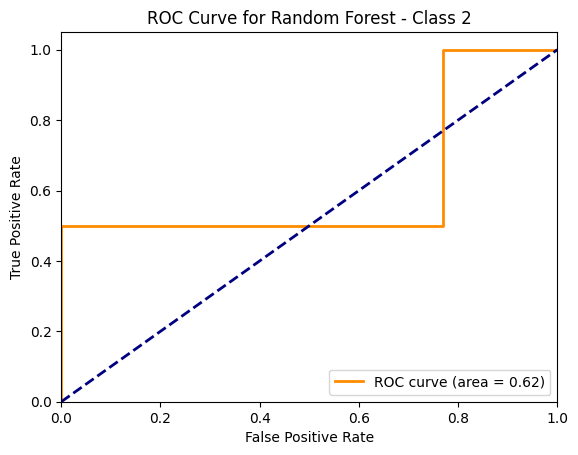

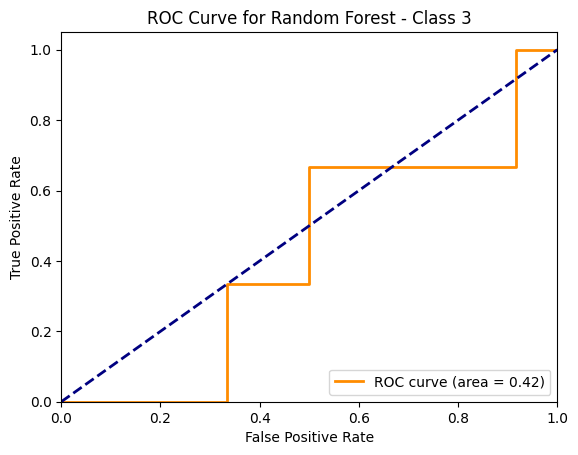

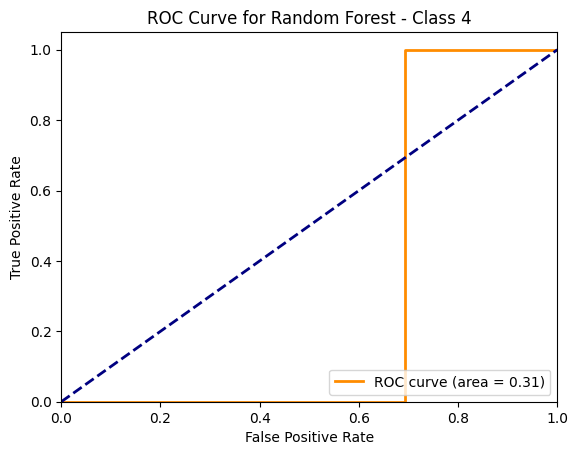

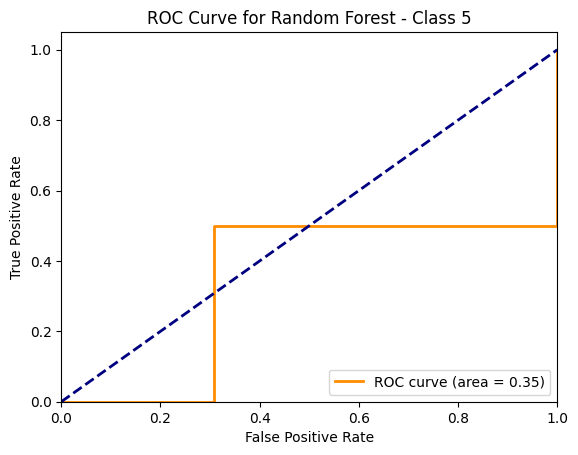

Random Forest - Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Random Forest - Best Accuracy: 0.5350877192982456


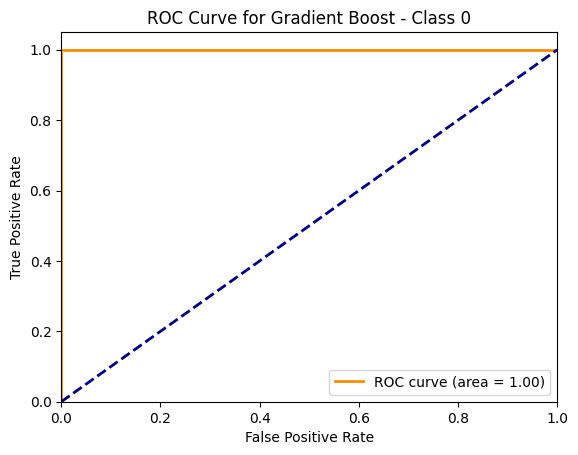

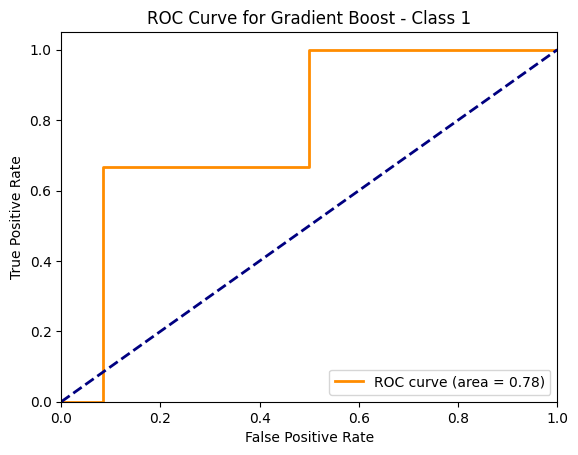

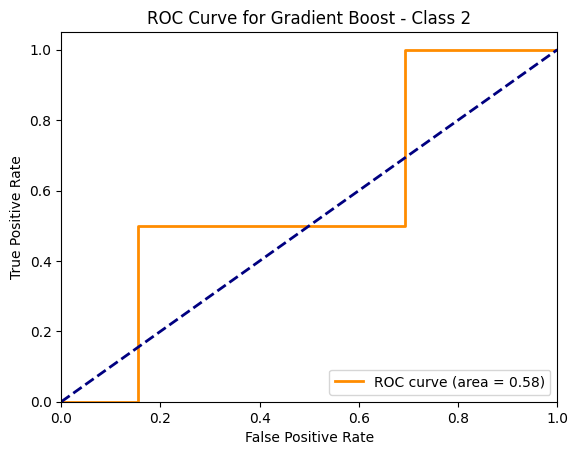

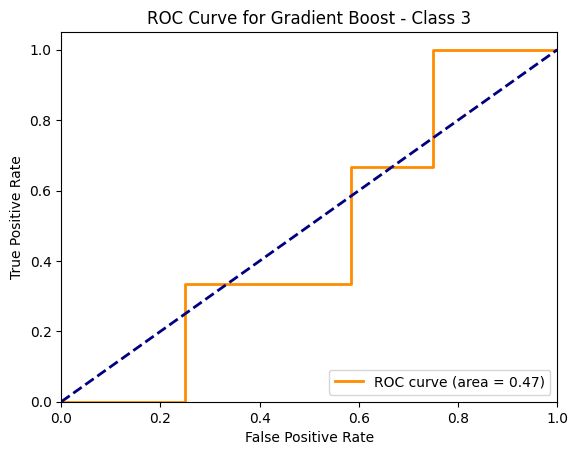

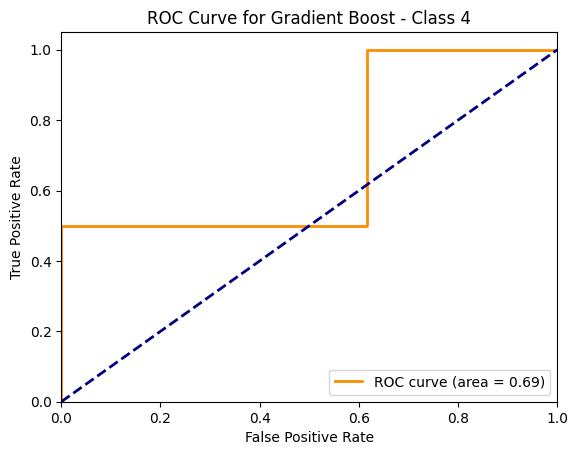

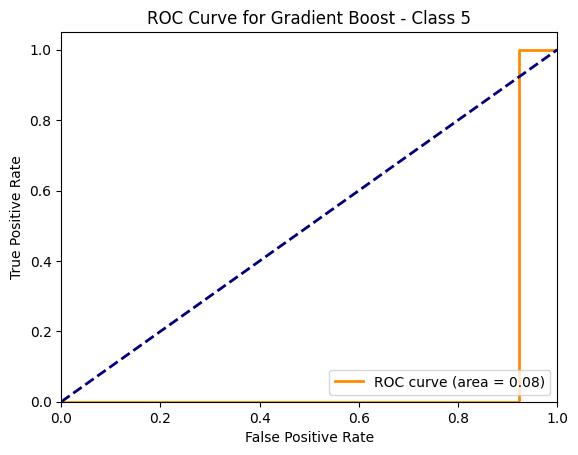

Gradient Boost - Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50}
Gradient Boost - Best Accuracy: 0.4619883040935672


In [251]:
import joblib

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=5000),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier()
}

# Define hyperparameters grid for each classifier
param_grids = {
    "Logistic Regression": {
        'classifier__C': [0.1, 1, 10],
        'classifier__max_iter': [100, 200, 300]
    },
    "SVM": {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    "Decision Tree": {
        'classifier__max_depth': [3, 5, 7],
        'classifier__min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    "Gradient Boost": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    },
}

# Use StratifiedKFold with fewer splits
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Train and evaluate each classifier with GridSearchCV
for name, classifier in classifiers.items():
    if name in param_grids:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', classifier)])
        grid_search = GridSearchCV(pipeline, param_grids[name], cv=cv, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        y_score = best_model.predict_proba(X_test)
        
        # Convert y_test to binary format
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

        # Plot ROC Curve for each class
        for i in range(y_test_bin.shape[1]):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            
            plt.figure()
            lw = 2
            plt.plot(fpr, tpr, color='darkorange',
                     lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
            plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve for {name} - Class {i}')
            plt.legend(loc="lower right")
            plt.show()
        
        print(f"{name} - Best Parameters: {grid_search.best_params_}")
        print(f"{name} - Best Accuracy: {grid_search.best_score_}")

        # Save the best model
        joblib.dump(best_model, 'ipl_best_model.joblib')


    else:
        print(f"{name} - No hyperparameter grid defined.")


In [258]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the saved model
model = joblib.load('ipl_best_model.joblib')

# Load and prepare the unseen data
unseen_data = pd.read_csv('C:\\Users\\Faris\\Downloads\\matches.csv')
X_unseen = unseen_data.drop(columns=['match_winner'])  # Adjust 'target_column' to your dataset

# Assuming you have the target labels in 'y_unseen'
y_unseen = unseen_data['match_winner']

# Make predictions on the unseen data
y_pred = model.predict(X_unseen)

# Evaluate the model's performance
accuracy = accuracy_score(y_unseen, y_pred)
precision = precision_score(y_unseen, y_pred, average='weighted')
recall = recall_score(y_unseen, y_pred, average='weighted')
f1 = f1_score(y_unseen, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9295774647887324
Precision: 0.9447092813289996
Recall: 0.9295774647887324
F1 Score: 0.9299399019562103


Based on the performance metrics of your model on the unseen data, we can draw the following conclusions:

High Performance: The model exhibits high accuracy (0.93), precision (0.94), recall (0.93), and F1 score (0.93). This indicates that the model is effective in predicting IPL match winners based on the provided features.

Reliable Predictions: The high precision suggests that when the model predicts a team will win, it is often correct. The high recall indicates that the model effectively identifies actual winners.

Balanced Performance: The F1 score, which considers both precision and recall, is also high, indicating a balanced performance between the two metrics.

Limitations: The dataset's limitations may include:

Data Quality: The accuracy of the model depends on the quality of the data. If the dataset contains errors or missing values, it could impact the model's performance.
Temporal Dynamics: The dataset may not capture the temporal dynamics of the IPL matches, such as team form, player injuries, or strategic changes, which can affect match outcomes.
In conclusion, while the model shows promising performance, there is always room for improvement by refining the features used and considering additional factors that could influence match outcomes.